In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

from Functions import *
from Fairness_functions import *

In [3]:
# Loading and preparing the dataset
loan_data = pd.read_csv("C:\\Users\\nvjad\\Downloads\\responsible ai\\LoanEE2.csv")

In [5]:
loan_data.head()

DefaultDate  NewCreditCustomer    LoanDate FirstPaymentDate  \
0         NaN              False  10/05/2019       08/07/2019   
1         NaN              False  10/05/2019       13/06/2019   
2         NaN              False  10/05/2019       17/06/2019   
3         NaN              False  10/05/2019       08/07/2019   
4         NaN              False  10/05/2019       17/06/2019   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                      3                         6               1.0   
1                      1                         6               1.0   
2                      7                         6               1.0   
3                      7                         6               1.0   
4                      7                         6               4.0   

   LanguageCode  Age  Gender  ... PreviousRepaymentsBeforeLoan  \
0             1   54       0  ...                       513.79   
1             1   52       0  ...                       579.84   
2             1   28       0  ...                       221.12   
3             1   40       0  ...                       275.98   
4             3   31       0  ...                       538.76   

   PreviousEarlyRepaymentsBefoleLoan  PreviousEarlyRepaymentsCountBeforeLoan  \
0                                NaN                                       0   
1                                NaN                                       0   
2                              530.0                                       1   
3                                NaN                                       0   
4                                NaN                                       0   

   NrOfScheduledPayments  PrincipalDebtServicingCost  \
0                   36.0                         NaN   
1                   60.0                         NaN   
2                   48.0                         NaN   
3                   60.0                         NaN   
4                   60.0                         NaN   

   InterestAndPenaltyDebtServicingCost  CreditScoreEsMicroL  \
0                                  NaN                    M   
1                                  NaN                    M   
2                                  NaN                    M   
3                                  NaN                    M   
4                                  NaN                    M   

   CreditScoreEsEquifaxRisk  CreditScoreFiAsiakasTietoRiskGrade  \
0                       NaN                                 NaN   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       NaN                                 NaN   
4                       NaN                                 NaN   

  CreditScoreEeMini  
0            1000.0  
1            1000.0  
2             900.0  
3            1000.0  
4            1000.0  

[5 rows x 75 columns]

In [7]:
print(loan_data.columns)

Index(['DefaultDate', 'NewCreditCustomer', 'LoanDate', 'FirstPaymentDate',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'NrOfDependants', 'NrOfDependantslessthan3',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'WorkExperience', 'WrExLess10', 'WrExLess5', 'OccupationArea',
       'HomeOwnershipType', 'Tenant', 'IncomeFromPrincipalEmployer',
       'IncomeFromPension', 'IncomeFromFamilyAllowance',
       'IncomeFromSocialWelfare', 'IncomeFromLeavePay',
       'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedPrincipalTillDate',
       'PlannedInterestTillDate', 'Cur

In [9]:
def process_loan_data(df):
    """
    Function to process loan data and create relevant features
    """
    # Creating a binary indicator for default status based on the presence of 'DefaultDate'
    df["HasDefaulted"] = df['DefaultDate'].apply(lambda val: 0 if pd.isnull(val) else 1)
    
    # Reverse encoding: If the loan is defaulted, set 1, else 0
    df["LoanStatus"] = df["HasDefaulted"].replace({0: 1, 1: 0})
    
    # Final default flag (alternative representation)
    df["FinalDefault"] = df["LoanStatus"].apply(lambda val: 0 if val == 1 else 1)

    # Transforming data (if needed, replace DataTransformer with actual transformation logic)
    return df  # You can add DataTransformer.transform(df) if it's a custom function

In [11]:
# Processing the dataset
processed_data = process_loan_data(loan_data)

# Assigning to a new dataframe
final_data = processed_data.copy()

In [13]:
# Creating a new categorical feature based on age
final_data["AgeCategory"] = final_data["Age"].apply(lambda age: "1" if age < 40 else "0")

# Converting categorical feature to integer
final_data["AgeCategory"] = final_data["AgeCategory"].astype(int)

# Displaying final processed data (first few rows)
print(final_data.head())

  DefaultDate  NewCreditCustomer    LoanDate FirstPaymentDate  \
0         NaN              False  10/05/2019       08/07/2019   
1         NaN              False  10/05/2019       13/06/2019   
2         NaN              False  10/05/2019       17/06/2019   
3         NaN              False  10/05/2019       08/07/2019   
4         NaN              False  10/05/2019       17/06/2019   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                      3                         6               1.0   
1                      1                         6               1.0   
2                      7                         6               1.0   
3                      7                         6               1.0   
4                      7                         6               4.0   

   LanguageCode  Age  Gender  ... PrincipalDebtServicingCost  \
0             1   54       0  ...                        NaN   
1             1   52       0  ...               

In [15]:
final_data.shape

(61321, 79)

In [17]:
final_data.columns

Index(['DefaultDate', 'NewCreditCustomer', 'LoanDate', 'FirstPaymentDate',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'NrOfDependants', 'NrOfDependantslessthan3',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'WorkExperience', 'WrExLess10', 'WrExLess5', 'OccupationArea',
       'HomeOwnershipType', 'Tenant', 'IncomeFromPrincipalEmployer',
       'IncomeFromPension', 'IncomeFromFamilyAllowance',
       'IncomeFromSocialWelfare', 'IncomeFromLeavePay',
       'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedPrincipalTillDate',
       'PlannedInterestTillDate', 'Cur

In [19]:
for col in final_data.columns:
    print(col)

DefaultDate
NewCreditCustomer
LoanDate
FirstPaymentDate
ApplicationSignedHour
ApplicationSignedWeekday
VerificationType
LanguageCode
Age
Gender
Country
AppliedAmount
Amount
Interest
LoanDuration
MonthlyPayment
UseOfLoan
Education
MaritalStatus
NrOfDependants
NrOfDependantslessthan3
EmploymentStatus
EmploymentDurationCurrentEmployer
WorkExperience
WrExLess10
WrExLess5
OccupationArea
HomeOwnershipType
Tenant
IncomeFromPrincipalEmployer
IncomeFromPension
IncomeFromFamilyAllowance
IncomeFromSocialWelfare
IncomeFromLeavePay
IncomeFromChildSupport
IncomeOther
IncomeTotal
ExistingLiabilities
LiabilitiesTotal
RefinanceLiabilities
DebtToIncome
FreeCash
MonthlyPaymentDay
ActiveScheduleFirstPaymentReached
PlannedPrincipalTillDate
PlannedInterestTillDate
CurrentDebtDaysPrimary
ExpectedLoss
LossGivenDefault
ExpectedReturn
ProbabilityOfDefault
PrincipalOverdueBySchedule
PrincipalRecovery
InterestRecovery
Rating
Status
Restructured
PrincipalPaymentsMade
InterestAndPenaltyPaymentsMade
PrincipalWriteOf

In [21]:
final_data["FinalDefault"].value_counts()

FinalDefault
0    46752
1    14569
Name: count, dtype: int64

In [23]:
import pandas as pd

# Define categorical columns
categorical_columns = [
    'Gender', 'Education', 'MaritalStatus', 'NrOfDependantslessthan3', 'EmploymentStatus',
    'WrExLess10', 'WrExLess5', 'HomeOwnershipType', 'Tenant', 'LanguageCode',
    'CreditScoreEsMicroL', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 'Rating',
    'Status', 'Restructured', 'ActiveScheduleFirstPaymentReached',
    'EmploymentDurationCurrentEmployer', 'WorkExperience', 'Country', 'NewCreditCustomer'
]

# Perform One-Hot Encoding for ALL categories without losing any
df_expanded = pd.get_dummies(final_data, columns=categorical_columns, drop_first=False, dtype=int)  # Keep all categories

# Verify encoding
print(f"Number of columns after One-Hot Encoding: {df_expanded.shape[1]}")
print(df_expanded.columns)


Number of columns after One-Hot Encoding: 144
Index(['DefaultDate', 'LoanDate', 'FirstPaymentDate', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'Age', 'AppliedAmount',
       'Amount', 'Interest',
       ...
       'EmploymentDurationCurrentEmployer_UpTo5Years',
       'WorkExperience_10To15Years', 'WorkExperience_15To25Years',
       'WorkExperience_2To5Years', 'WorkExperience_5To10Years',
       'WorkExperience_LessThan2Years', 'WorkExperience_MoreThan25Years',
       'Country_EE', 'NewCreditCustomer_False', 'NewCreditCustomer_True'],
      dtype='object', length=144)


In [25]:
df_expanded.shape

(61321, 144)

In [30]:
# Fill NaN values with 0 to prevent conversion errors
df_expanded = df_expanded.fillna(0)

In [32]:
# Check column data types
print(df_expanded.dtypes)

DefaultDate                       object
LoanDate                          object
FirstPaymentDate                  object
ApplicationSignedHour              int64
ApplicationSignedWeekday           int64
                                   ...  
WorkExperience_LessThan2Years      int32
WorkExperience_MoreThan25Years     int32
Country_EE                         int32
NewCreditCustomer_False            int32
NewCreditCustomer_True             int32
Length: 144, dtype: object


In [34]:
# Convert date columns to datetime format
date_columns = ['DefaultDate', 'LoanDate', 'FirstPaymentDate']  # Adjust as needed
for col in date_columns:
    df_expanded[col] = pd.to_datetime(df_expanded[col], errors='coerce')  # Convert to datetime
    df_expanded[col + '_Year'] = df_expanded[col].dt.year
    df_expanded[col + '_Month'] = df_expanded[col].dt.month
    df_expanded[col + '_Day'] = df_expanded[col].dt.day

# Drop original date columns
df_expanded = df_expanded.drop(columns=date_columns)


In [36]:
# Fill NaN values with 0
df_expanded = df_expanded.fillna(0)

# Convert True/False to 1/0 and numeric values to binary
for col in df_expanded.select_dtypes(include=['bool', 'float64', 'int64']).columns:
    df_expanded[col] = (df_expanded[col] > df_expanded[col].median()).astype(int)

In [38]:
df_expanded.shape

(61321, 150)

In [40]:
df_expanded.head()

ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  Age  \
0                      0                         1                 0    1   
1                      0                         1                 0    1   
2                      0                         1                 0    0   
3                      0                         1                 0    1   
4                      0                         1                 1    0   

   AppliedAmount  Amount  Interest  LoanDuration  MonthlyPayment  UseOfLoan  \
0              1       1         1             0               1          0   
1              1       1         0             1               1          0   
2              0       0         0             1               0          0   
3              0       0         0             1               0          0   
4              0       0         0             1               0          0   

   ... NewCreditCustomer_True  DefaultDate_Year  DefaultDate_Month  \
0  ...                      0              1970                  1   
1  ...                      0              1970                  1   
2  ...                      0              1970                  1   
3  ...                      0              1970                  1   
4  ...                      0              1970                  1   

   DefaultDate_Day  LoanDate_Year  LoanDate_Month  LoanDate_Day  \
0                1              1               1             1   
1                1              1               1             1   
2                1              1               1             1   
3                1              1               1             1   
4                1              1               1             1   

   FirstPaymentDate_Year  FirstPaymentDate_Month  FirstPaymentDate_Day  
0                      1                       1                     1  
1                      0                       0                     0  
2                      0                       0                     0  
3                      1                       1                     1  
4                      0                       0                     0  

[5 rows x 150 columns]

In [42]:
df_expanded.shape

(61321, 150)

In [44]:
df_expanded["FinalDefault"].value_counts()

FinalDefault
0    46752
1    14569
Name: count, dtype: int64

In [46]:
#df_expanded.to_excel("output.xlsx", index=False) 

Data Bias Detection

In [49]:

fav=0
unfav=int(not fav)

In [51]:
df_expanded.columns

Index(['ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan',
       ...
       'NewCreditCustomer_True', 'DefaultDate_Year', 'DefaultDate_Month',
       'DefaultDate_Day', 'LoanDate_Year', 'LoanDate_Month', 'LoanDate_Day',
       'FirstPaymentDate_Year', 'FirstPaymentDate_Month',
       'FirstPaymentDate_Day'],
      dtype='object', length=150)

In [53]:
for col in df_expanded.columns:
    print(col)

ApplicationSignedHour
ApplicationSignedWeekday
VerificationType
Age
AppliedAmount
Amount
Interest
LoanDuration
MonthlyPayment
UseOfLoan
NrOfDependants
OccupationArea
IncomeFromPrincipalEmployer
IncomeFromPension
IncomeFromFamilyAllowance
IncomeFromSocialWelfare
IncomeFromLeavePay
IncomeFromChildSupport
IncomeOther
IncomeTotal
ExistingLiabilities
LiabilitiesTotal
RefinanceLiabilities
DebtToIncome
FreeCash
MonthlyPaymentDay
PlannedPrincipalTillDate
PlannedInterestTillDate
CurrentDebtDaysPrimary
ExpectedLoss
LossGivenDefault
ExpectedReturn
ProbabilityOfDefault
PrincipalOverdueBySchedule
PrincipalRecovery
InterestRecovery
PrincipalPaymentsMade
InterestAndPenaltyPaymentsMade
PrincipalWriteOffs
InterestAndPenaltyWriteOffs
PrincipalBalance
InterestAndPenaltyBalance
NoOfPreviousLoansBeforeLoan
AmountOfPreviousLoansBeforeLoan
PreviousRepaymentsBeforeLoan
PreviousEarlyRepaymentsBefoleLoan
PreviousEarlyRepaymentsCountBeforeLoan
NrOfScheduledPayments
PrincipalDebtServicingCost
InterestAndPenaltyDe

In [55]:
a='Gender_1' #Male
b='Education_1' #Higher Ed
c='AgeCategory' # Age group
d='HomeOwnershipType_1' #Owner 
e='HomeOwnershipType_8' #Mortgages
f='EmploymentStatus_5' #Entrepreneur
g="Tenant_1" #Tenant

i='LanguageCode_2' #Estonian
j='LanguageCode_3' #English
k="NrOfDependantslessthan3_0" #No of dependent less than 10 years
l='MaritalStatus_1' #Married
m='MaritalStatus_3' #Single
n='MaritalStatus_4' #Divorced

p="WorkExperience_5To10Years" #Work ex less than 10 years
q="WorkExperience_2To5Years" #Work ex less than 5 years

In [57]:
def stat_parity_test(data, protected_attribute_name, label, fav, priv_value, unpriv_value):
    # Filter privileged and unprivileged subsets
    priv_subset = data[data[protected_attribute_name] == priv_value]
    unpriv_subset = data[data[protected_attribute_name] == unpriv_value]

    # Get total counts
    total_priv = len(priv_subset)
    total_unpriv = len(unpriv_subset)

    # Avoid division by zero
    if total_priv == 0 or total_unpriv == 0:
        print(f" Warning: No samples found for {protected_attribute_name} with value {priv_value} or {unpriv_value}. Skipping.")
        return 0, 0  # Return neutral values

    # Compute counts of favorable outcomes
    priv_count_pos = len(priv_subset[priv_subset[label] == fav])
    unpriv_count_pos = len(unpriv_subset[unpriv_subset[label] == fav])

    # Compute Statistical Parity Difference
    stat_parity = (unpriv_count_pos / total_unpriv) - (priv_count_pos / total_priv)

    # Compute Disparate Impact (Handling division errors)
    if priv_count_pos == 0:
        disparate_impact = 0  # If no positive cases in the privileged group, set DI to 0
    else:
        disparate_impact = (unpriv_count_pos / total_unpriv) / (priv_count_pos / total_priv)

    print(f"Statistical Parity Difference: {stat_parity}, Disparate Impact: {disparate_impact}")
    return stat_parity, disparate_impact


In [59]:
label_names=['FinalDefault']

protected_attribute_names=[a,b,c,d,e,f,g,i,j,k,l,m,n,p,q]

#privileged_groups = [{b: 1}, {c:1}, {d:1}, {e: 1}, {g:1}, {h: 1}, {i:1}, {f:1}, {k:1}] #Male
privileged_groups = [{a :0}, {b :0}, {c :0}, {d :0}, {e :0}, {f :0}, 
                        {g :0}, {i :0}, {j :0}, {k :0}, 
                        {l :0}, {m :0}, {n:0}, {p :0}, {q :0}]



#unprivileged_groups = [{b: 0}, {c:0}, {d:0}, {e: 0}, {g:0}, {h: 0}, {i:0}, {f:0}, {k:0}] #Female


unprivileged_groups = [{a :1}, {b :1}, {c :1}, {d :1}, {e :1}, {f :1}, 
                        {g :1}, {i :1}, {j :1}, {k :1}, 
                        {l :1}, {m :1}, {n:1}, {p :1}, {q :1}]

In [61]:
input_dataframe = df_expanded.copy()
INPUT_DATAFRAME = input_dataframe
LABEL_NAMES = label_names
PROTECTED_ATTRIBUTE_NAMES = protected_attribute_names
PRIVILEGED_GROUPS = privileged_groups
UNPRIVILEGED_GROUP = unprivileged_groups

SP=[]
DI=[]
Protected=[]
for groupe in range(0, len(protected_attribute_names)):
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    privileged_group_protected_attribute_value = PRIVILEGED_GROUPS[groupe][protected_attribute_name]
    unprivileged_group_protected_attribute_value = UNPRIVILEGED_GROUP[groupe][protected_attribute_name]
    print(protected_attribute_name, privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)
    
    stat_parity, disprate_impact = stat_parity_test(df_expanded, protected_attribute_name, 'FinalDefault', fav,
              privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)
    
    SP.append(stat_parity)
    DI.append(disprate_impact)
    Protected.append(protected_attribute_name)
    
    print ("")

Gender_1 0 1
Statistical Parity Difference: -0.06542882092163849, Disparate Impact: 0.9160414712550877

Education_1 0 1
Statistical Parity Difference: 0.04253798360387828, Disparate Impact: 1.055987579014743

AgeCategory 0 1
Statistical Parity Difference: -0.07241068853497912, Disparate Impact: 0.9098162947410234

HomeOwnershipType_1 0 1
Statistical Parity Difference: 0.03308219776293675, Disparate Impact: 1.0441758557196397

HomeOwnershipType_8 0 1
Statistical Parity Difference: 0.10150342452057504, Disparate Impact: 1.134839797576764

EmploymentStatus_5 0 1
Statistical Parity Difference: -0.08650158252530704, Disparate Impact: 0.8868813799464257

Tenant_1 0 1
Statistical Parity Difference: -0.0573416833805781, Disparate Impact: 0.9259271443038499

LanguageCode_2 0 1
Statistical Parity Difference: -0.04328406445997812, Disparate Impact: 0.9432495336719515

LanguageCode_3 0 1
Statistical Parity Difference: -0.037553422063737574, Disparate Impact: 0.9511205527688698

NrOfDependantslesst

Ideally Statistical Parity Difference should be between -0.1 and 0.1,Disparate Impact should be between 0.90 and 1.10

In [64]:
SP, DI, Protected
d = pd.DataFrame({'Protected_feature':Protected,'Statistical_Parity':SP,'Disparate_Impact':DI})
d['DI_normal']=d["Disparate_Impact"].apply(lambda x: 1/x if x < 1 else x)
d['SP_normal']=d["Statistical_Parity"].apply(lambda x: abs(x) if x < 0 else x)


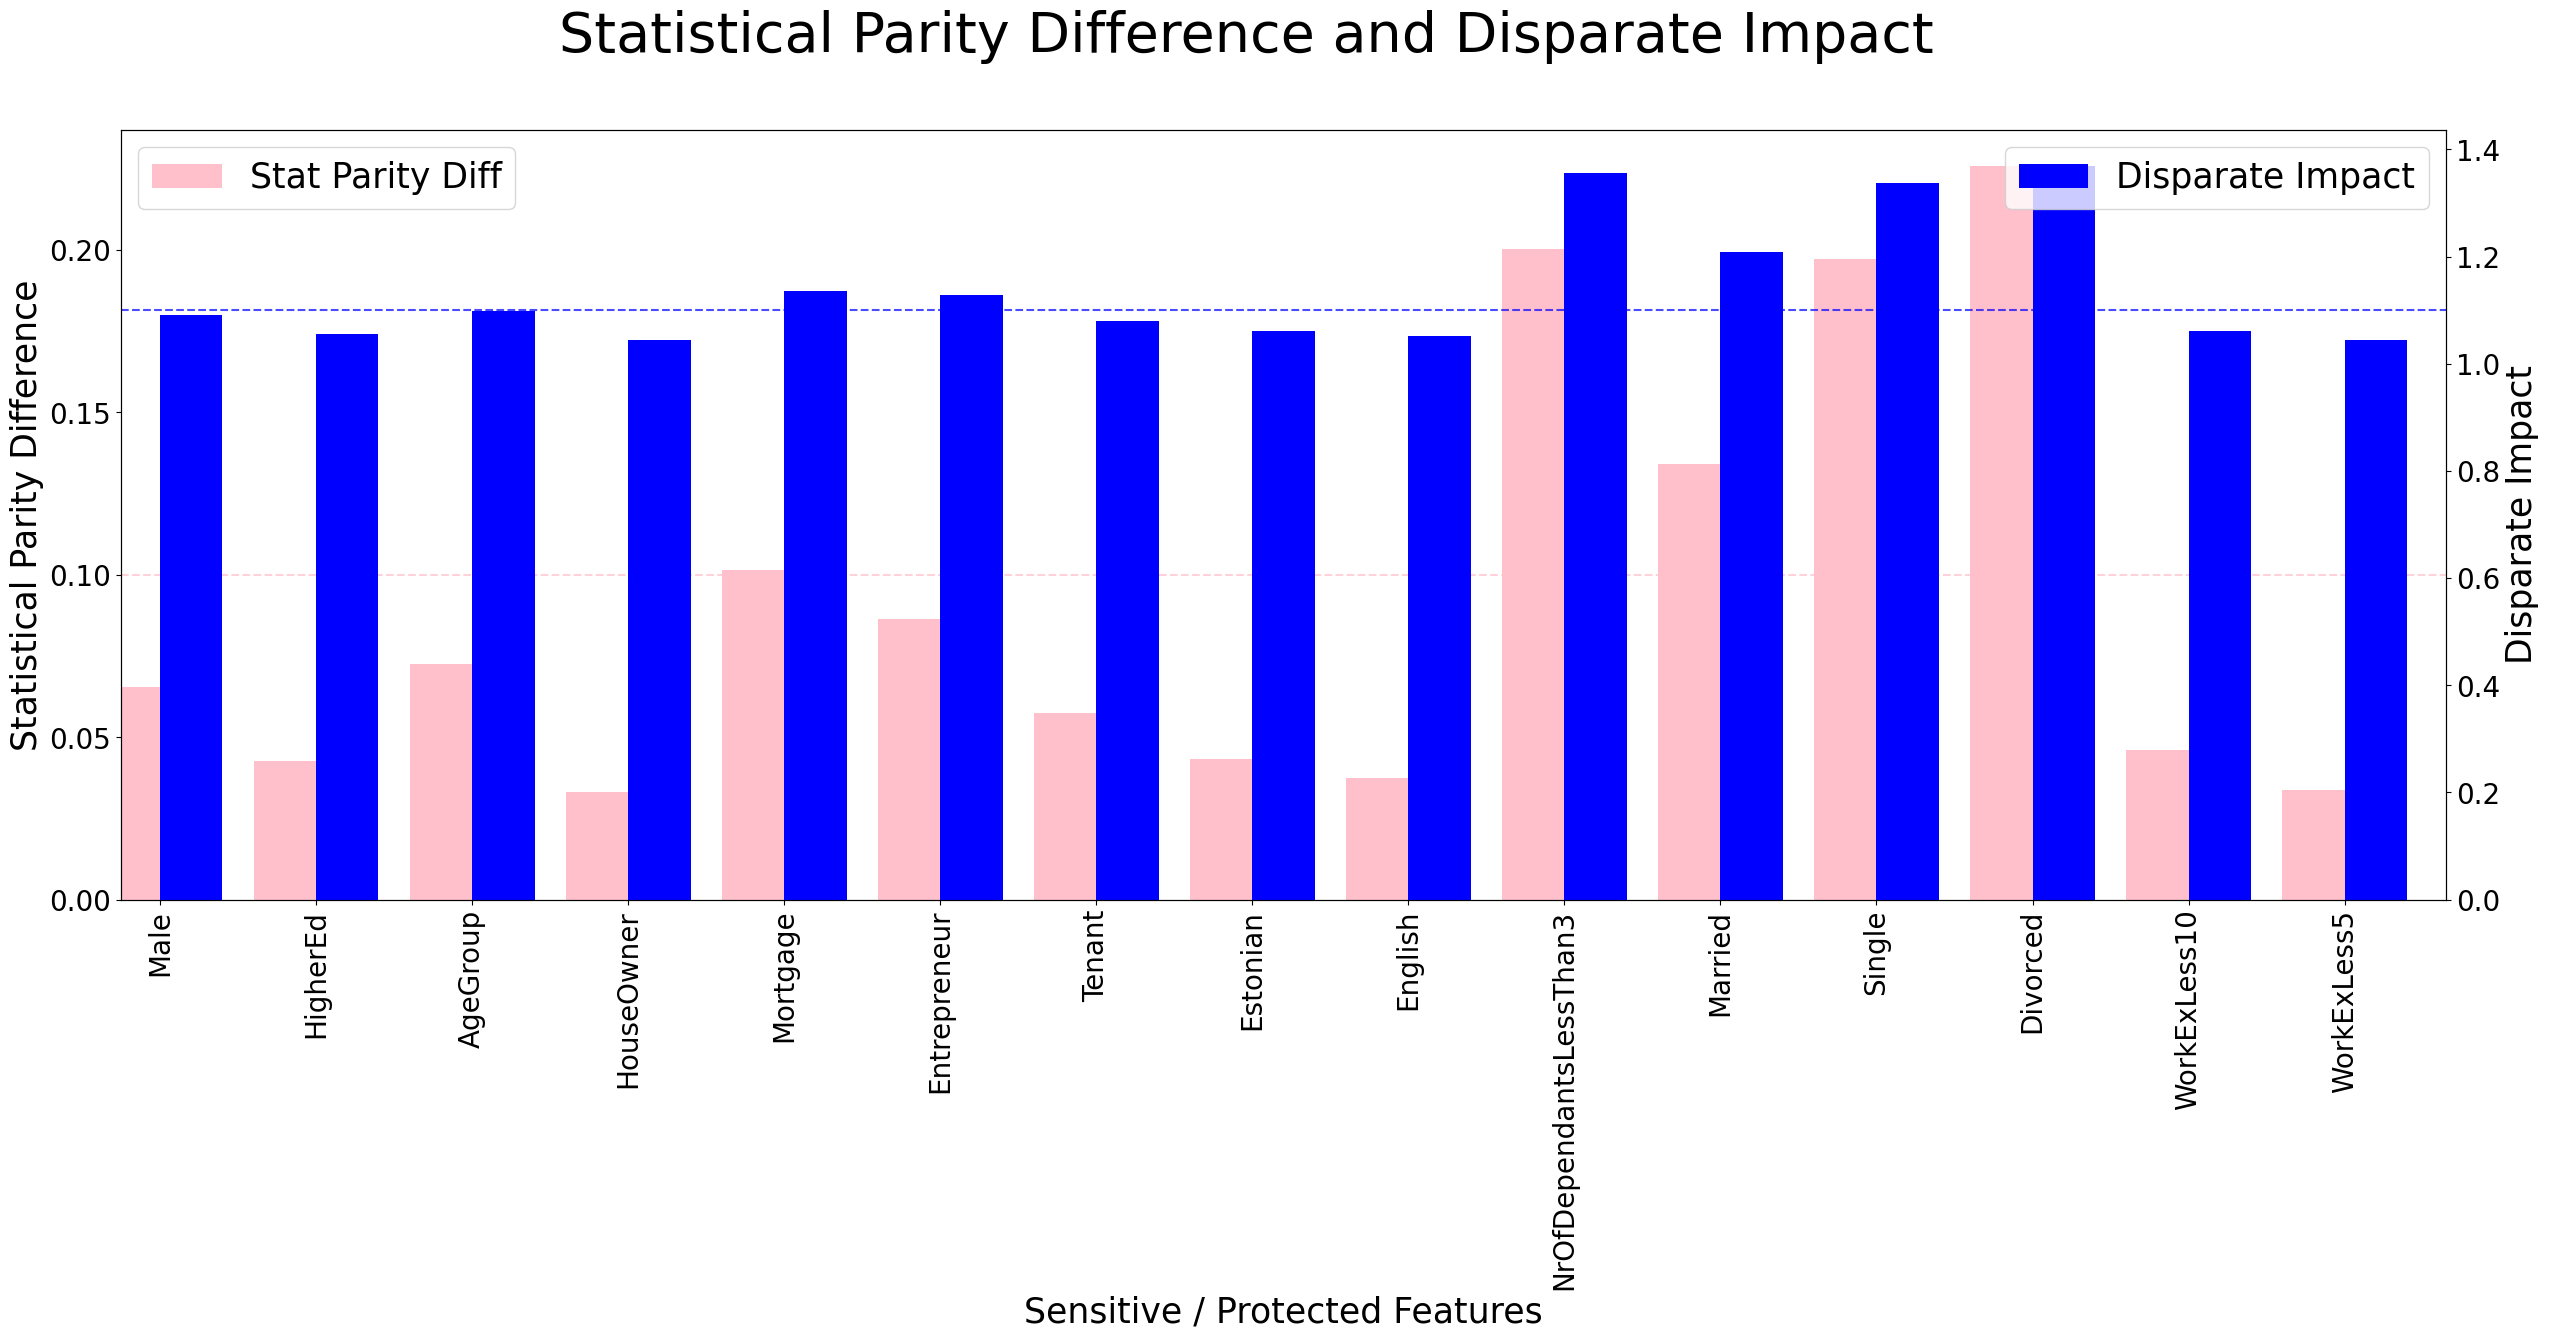

In [66]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


fig.suptitle('Statistical Parity Difference and Disparate Impact', fontsize=40, y=1)


width = 0.4
d.plot(x ='Protected_feature', y='SP_normal', kind = 'bar', ax=ax, width=width, 
       position=1, color='pink', legend=False, figsize=(30,10), fontsize=20)

d.plot(x ='Protected_feature', y='DI_normal', kind = 'bar', ax=ax2, width=width, 
       position=0, color='blue', legend=False, figsize=(30,10), fontsize=20)

ax.axhline(y=0.1, linestyle='dashed', alpha=0.7, color='pink')
ax2.axhline(y=1.10, linestyle='dashed', alpha=0.7, color='blue')


patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['Stat Parity Diff'], loc='upper left', fontsize=25)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, ['Disparate Impact'], loc='upper right', fontsize=25)



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Male'
labels[1] = 'HigherEd'
labels[2] = 'AgeGroup'
labels[3] = 'HouseOwner'
labels[4] = 'Mortgage'
labels[5] = 'Entrepreneur'
labels[6] = 'Tenant'
labels[7] = 'Estonian'
labels[8] = 'English'
labels[9] = 'NrOfDependantsLessThan3'
labels[10] = 'Married'
labels[11] = 'Single'
labels[12] = 'Divorced'
labels[13] = 'WorkExLess10'
labels[14] = 'WorkExLess5'

ax.set_xticklabels(labels)


#ax2.axhline(y=.80, linestyle='dashed', alpha=0.7, color='black')

ax.set_xlabel('Sensitive / Protected Features', fontsize=25)

ax.set_ylabel('Statistical Parity Difference', fontsize=25)
ax2.set_ylabel('Disparate Impact', fontsize=25)

plt.show()

--Most attributes (Male, HigherEd, AgeGroup, HouseOwner, Mortgage, Entrepreneur, Tenant, Estonian, English) have balanced fairness (DI ≈ 1.0, low SPD).

--"No. of Dependents <3", Marital Status (Married, Single, Divorced) show high SPD & DI > 1.1, indicating possible bias favoring these groups.

--Work Experience (<10 & <5 years) has DI < 0.9, suggesting potential adverse selection against these groups.

--Fairness adjustments may be needed for attributes with extreme SPD (>0.1 or <-0.1) and DI (>1.1 or <0.9) to reduce disparity.

Frequency for sensitive features

In [70]:
for groupe in range(0, len(protected_attribute_names)):
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]

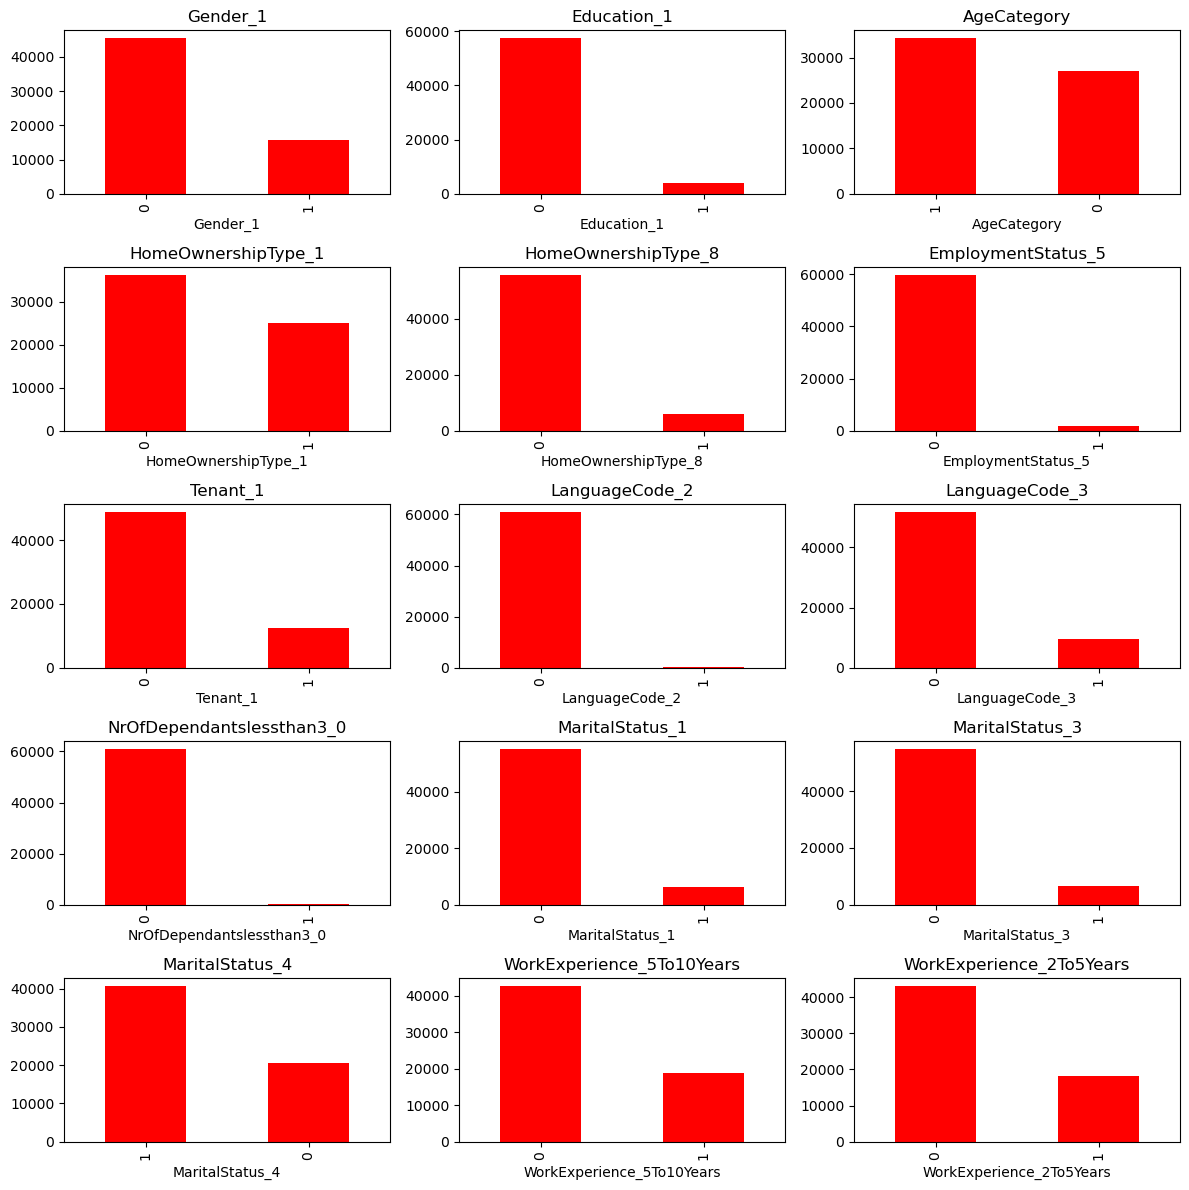

In [72]:
fig = plt.figure()

#ax = sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
#ax.set_title("Frequency of each sensitive features", fontsize=15) # fontweight="bold"



for groupe in range(0, len(protected_attribute_names)):
    #plt.figure(figsize = (4,2))
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    #data[protected_attribute_name].value_counts().plot(kind='bar')
    ax = fig.add_subplot(5,3,groupe+1)

    
    vc=df_expanded[protected_attribute_name].value_counts()
    ax=vc.plot(kind='bar', figsize=(12,12), title=protected_attribute_name, color = 'red')
    #axes.plot(vc)


plt.tight_layout()
plt.show()

Cross-tabs for sensitive features

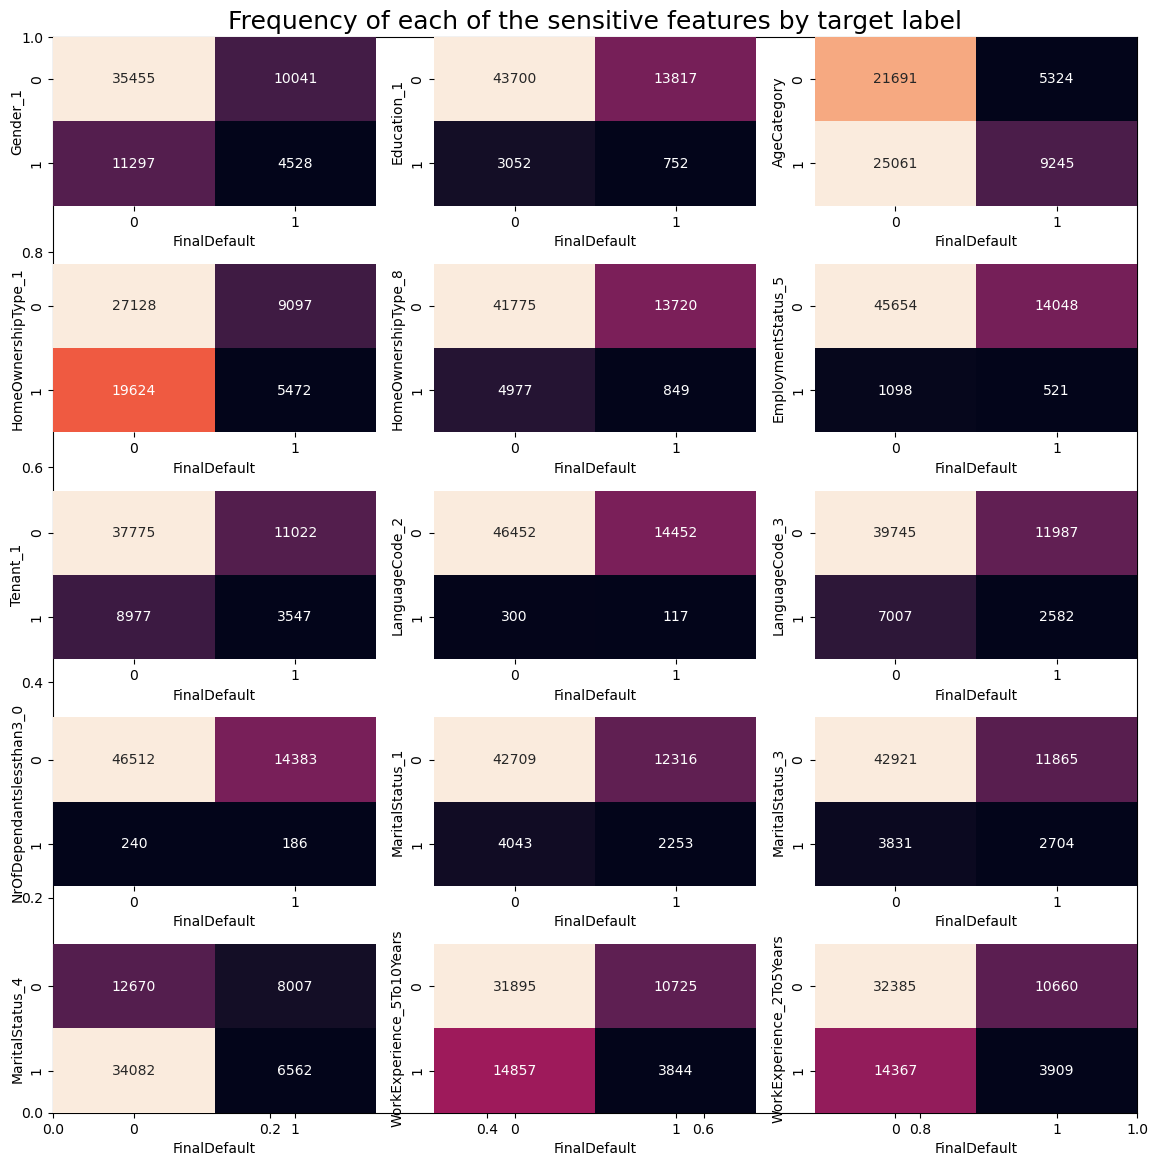

In [74]:
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,12))
#plt.suptitle('lalala')
ax.set_title("Frequency of each of the sensitive features by target label", fontsize=18)


for groupe in range(0, len(protected_attribute_names)):
    #_,ax = plt.figure(figsize = (8,8))
    protected_attribute_name = list(privileged_groups[groupe].keys())[0]
    #data[protected_attribute_name].value_counts().plot(kind='bar')
    ax = fig.add_subplot(5,3,groupe+1)

    plotdf=pd.crosstab(df_expanded[protected_attribute_name], df_expanded['FinalDefault'])
    ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, ax=ax)    #axes.plot(vc)
    #print (type(axes))


plt.tight_layout()
plt.show()

Calculation for Statistical Parity and Disparate Impact for a given protected feature

Defining the protected (sensitive) feature and identifying privileged & unprivileged groups: This analysis aims to detect bias based on a sensitive feature that indicates whether a customer is Married or Not.

In [78]:
choice = 'MaritalStatus_1'
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged

In [79]:
label_names=['FinalDefault']
protected_attribute_names=[choice]
privileged_groups=[{choice: pval}]
unprivileged_groups=[{choice: upval }]

In [80]:
input_dataframe = df_expanded
INPUT_DATAFRAME = input_dataframe

LABEL_NAMES = label_names
PROTECTED_ATTRIBUTE_NAMES = protected_attribute_names
PRIVILEGED_GROUPS = privileged_groups
UNPRIVILEGED_GROUP = unprivileged_groups

In [81]:
protected_attribute_name = list(UNPRIVILEGED_GROUP[0].keys())[0]
privileged_group_protected_attribute_value = PRIVILEGED_GROUPS[0][protected_attribute_name]
unprivileged_group_protected_attribute_value = UNPRIVILEGED_GROUP[0][protected_attribute_name]

Calculating Statistical Parity and Disparate Impact scores

In [83]:
stat_parity, disprate_impact = stat_parity_test(df_expanded, protected_attribute_name, 'FinalDefault', fav,
              privileged_group_protected_attribute_value, unprivileged_group_protected_attribute_value)

Statistical Parity Difference: -0.1340207177400593, Disparate Impact: 0.8273317100927963


In [84]:
PRIVILEGED_GROUPS
UNPRIVILEGED_GROUP

instance_weight = np.repeat(1, len(df_expanded)) 
df_expanded['instance_weights']=instance_weight

In [86]:
n = np.sum(df_expanded['instance_weights']) #Total number of instances

In [87]:
n_p = np.sum(df_expanded['instance_weights'][df_expanded[choice]==pval]) #Total number of privileged
n_up = np.sum(df_expanded['instance_weights'][df_expanded[choice]==upval]) #Total number of unprivileged

In [88]:
n_fav = np.sum(df_expanded['instance_weights'][df_expanded['FinalDefault']==0]) #Total number of favourable
n_unfav = np.sum(df_expanded['instance_weights'][df_expanded['FinalDefault']==1]) #Total number of unfavourable

In [89]:
n_p_fav=df_expanded[(df_expanded[choice]==pval)&(df_expanded['FinalDefault']==0)] 
n_p_unfav=df_expanded[(df_expanded[choice]==pval)&(df_expanded['FinalDefault']==1)] 
n_up_fav=df_expanded[(df_expanded[choice]==upval)&(df_expanded['FinalDefault']==0)] 
n_up_unfav=df_expanded[(df_expanded[choice]==upval)&(df_expanded['FinalDefault']==1)] 

w_n_p_fav = np.sum(n_p_fav['instance_weights']) #Total number of privileged and favourable
w_n_p_unfav = np.sum(n_p_unfav['instance_weights']) #Total number of privileged and unfavourable
w_n_up_fav = np.sum(n_up_fav['instance_weights']) #Total number of unprivileged and favourable
w_n_up_unfav = np.sum(n_up_unfav['instance_weights']) #Total number of unprivileged and unfavourable

In [90]:
w_n_p_fav, w_n_p_unfav, w_n_up_fav, w_n_up_unfav #No of instances per combination

(42709, 12316, 4043, 2253)

In [97]:
w_p_fav = (n_fav*n_p) / (n*w_n_p_fav)
w_p_unfav = (n_unfav*n_p) / (n*w_n_p_unfav)
w_up_fav = (n_fav*n_up) / (n*w_n_up_fav)
w_up_unfav = (n_unfav*n_up) / (n*w_n_up_unfav)

w_p_fav, w_p_unfav, w_up_fav, w_up_unfav

(0.9822716597371903, 1.061477726882457, 1.1872766965828196, 0.6639326745298092)

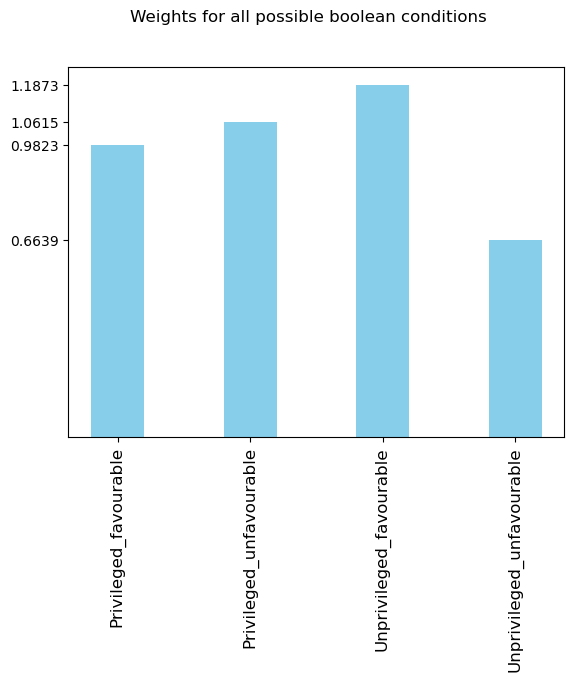

In [103]:
top=[('Privileged_favourable',w_p_fav),('Privileged_unfavourable',w_p_unfav),('Unprivileged_favourable',w_up_fav), ('Unprivileged_unfavourable',w_up_unfav)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = .4

plt.suptitle('Weights for all possible boolean conditions', fontsize=12, y=1)

plt.bar(xs, ys, width, color='skyblue')

plt.xticks(xs, labels, rotation=90, fontsize=12) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys, fontsize=10)


plt.show()

Bias before and after reweighing

In [105]:
DiscriminationBefore=(w_n_p_fav/n_p)-(w_n_up_fav/n_up)
DiscriminationAfter=(w_n_p_fav/n_p *w_p_fav)-(w_n_up_fav/n_up *w_up_fav )


DiscriminationBefore, DiscriminationAfter

(0.1340207177400593, 1.1102230246251565e-16)

In [107]:
datatest=df_expanded
datatest['NewWeights']= np.repeat(999, len(datatest)) 
datatest.loc[(datatest[choice]==pval) & (datatest['FinalDefault']==0), 'NewWeights'] = w_p_fav
datatest.loc[(datatest[choice]==pval) & (datatest['FinalDefault']==1), 'NewWeights'] = w_p_unfav
datatest.loc[(datatest[choice]==upval) & (datatest['FinalDefault']==0), 'NewWeights'] = w_up_fav
datatest.loc[(datatest[choice]==upval) & (datatest['FinalDefault']==1), 'NewWeights'] = w_up_unfav

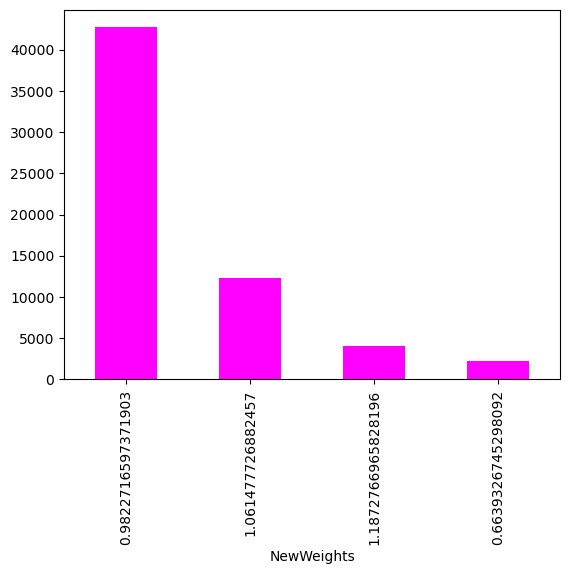

In [108]:
fig, ax = plt.subplots()
datatest['NewWeights'].value_counts().plot(ax=ax, kind='bar', color='magenta')
plt.show()

Model development with and without weights

In [112]:
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

In [115]:
target=['FinalDefault']

In [117]:
x=datatest.drop(columns=['Age', 'instance_weights','FinalDefault'])
y=datatest['FinalDefault']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=8475)

In [122]:
X_train_weights=X_train['NewWeights']
X_test_weights=X_test['NewWeights']

X_train1=X_train.drop(columns=["NewWeights"])
X_test1=X_test.drop(columns=["NewWeights"])

In [124]:
X_train1.head()

ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
13570                      1                         1                 1   
36007                      0                         0                 1   
42558                      0                         1                 0   
14741                      1                         0                 0   
39368                      1                         0                 0   

       AppliedAmount  Amount  Interest  LoanDuration  MonthlyPayment  \
13570              1       1         0             1               1   
36007              0       0         0             1               0   
42558              0       0         0             0               0   
14741              1       1         1             1               1   
39368              1       1         0             1               1   

       UseOfLoan NrOfDependants  ...  NewCreditCustomer_True  \
13570          1              1  ...                       1   
36007          0              0  ...                       1   
42558          0              0  ...                       0   
14741          0              0  ...                       0   
39368          0              3  ...                       1   

       DefaultDate_Year  DefaultDate_Month  DefaultDate_Day  LoanDate_Year  \
13570              2019                  5               13              1   
36007              1970                  1                1              0   
42558              1970                  1                1              0   
14741              2017                  2               27              0   
39368              2018                  1               23              0   

       LoanDate_Month  LoanDate_Day  FirstPaymentDate_Year  \
13570               1             1                      1   
36007               0             0                      1   
42558               0             0                      0   
14741               0             0                      1   
39368               0             0                      1   

       FirstPaymentDate_Month  FirstPaymentDate_Day  
13570                       1                     1  
36007                       1                     0  
42558                       0                     0  
14741                       1                     1  
39368                       1                     1  

[5 rows x 148 columns]

Total accuracy of the model

In [127]:
print(X_train1.dtypes)

ApplicationSignedHour       int32
ApplicationSignedWeekday    int32
VerificationType            int32
AppliedAmount               int32
Amount                      int32
                            ...  
LoanDate_Month              int32
LoanDate_Day                int32
FirstPaymentDate_Year       int32
FirstPaymentDate_Month      int32
FirstPaymentDate_Day        int32
Length: 148, dtype: object


In [129]:
X_train1['NrOfDependants'] = X_train1['NrOfDependants'].replace({'10Plus': 10, '5': 5, '8': 8}).astype(float)
X_test1['NrOfDependants'] = X_test1['NrOfDependants'].replace({'10Plus': 10, '5': 5, '8': 8}).astype(float)

In [131]:
clf_wow = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train)

In [132]:
y_pred_wow=clf_wow.predict(X_test1)
y_pred_prob_wow=clf_wow.predict_proba(X_test1)[:,0]

In [133]:
print("Accuracy of the model without weights:", clf_wow.score(X_test1, y_test))

Accuracy of the model without weights: 0.9999456433114094


Accuracy difference between privileged and unprivileged group

In [135]:
A_wow=clf_wow.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0]) #pval = 0 is Priviliged
B_wow=clf_wow.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference between two groups:", abs(B_wow-A_wow)*100, "%")

Accuracy difference between two groups: 0.006059504332545096 %


Model with weights

In [137]:
clf_ww = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train, sample_weight=X_train_weights)

In [138]:
y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,0]

Total accuracy of the model with weights

In [140]:
print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))

Accuracy of the model with weights: 0.9999456433114094


Accuracy difference between privileged and unprivileged group (model with weights)

In [149]:
A_ww=clf_ww.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0])
B_ww=clf_ww.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1])
print("Accuracy difference between two groups:", abs(B_ww-A_ww)*100, "%" )

Accuracy difference between two groups: 0.006059504332545096 %


In [151]:
import pandas as pd

# Accuracy values (Replace with actual values from your experiment)
overall_accuracy_without_weights = 0.9999456433114094
overall_accuracy_with_weights = 0.9999456433114094

accuracy_diff_without_weights = 0.006059504332545096 
accuracy_diff_with_weights =  0.006059504332545096 

# Compute the delta (change after applying weights)
delta_accuracy = overall_accuracy_with_weights - overall_accuracy_without_weights
delta_accuracy_diff = accuracy_diff_with_weights - accuracy_diff_without_weights

# Create a DataFrame for displaying the summary
summary_df = pd.DataFrame({
    "Metrics": ["Overall Accuracy", "Accuracy Difference"],
    "Without Weights": [overall_accuracy_without_weights, accuracy_diff_without_weights],
    "With Weights": [overall_accuracy_with_weights, accuracy_diff_with_weights],
    "Delta": [delta_accuracy, delta_accuracy_diff]
})

# Display the table
from IPython.display import display
display(summary_df)

Metrics  Without Weights  With Weights  Delta
0     Overall Accuracy         0.999946      0.999946    0.0
1  Accuracy Difference         0.006060      0.006060    0.0

Various other accuracy metrics before and after reweighing

In [154]:
import numpy as np
import pandas as pd

# Ensure NumPy compatibility (replace deprecated np.float)
def gini(actual, pred):
    """
    Compute Gini coefficient for model predictions.
    """
    assert len(actual) == len(pred)
    all_ = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float64)  # Updated dtype
    all_ = all_[np.lexsort((all_[:, 2], -1 * all_[:, 1]))]
    total_losses = all_[:, 0].sum()
    return total_losses

# Model Performance Evaluation
def model_metrics(y_true, y_pred_prob, y_pred):
    """
    Compute model evaluation metrics.
    """
    from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, average_precision_score
    
    auc = roc_auc_score(y_true, y_pred_prob)
    gini_score = gini(y_true, y_pred_prob) / gini(y_true, y_true)
    avg_precision = average_precision_score(y_true, y_pred_prob)
    precision = precision_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    false_negative_rate = 1 - sensitivity
    f1 = f1_score(y_true, y_pred)
    
    return [auc, gini_score, avg_precision, precision, sensitivity, false_negative_rate, f1]

# Assuming y_test, y_pred_prob_ww, y_pred_ww, y_pred_prob_wow, y_pred_wow are available
model_perf_with_weights = model_metrics(y_test, y_pred_prob_ww, y_pred_ww)
model_perf_without_weights = model_metrics(y_test, y_pred_prob_wow, y_pred_wow)

headers = ["AUC", "Gini", "Avg Precision Score", "Precision", "Sensitivity", 
           "False Negative Rate", "F1 Score"]

# Creating Performance Table
model_table_df = pd.DataFrame({
    "Metrics": headers,
    "With Weights": model_perf_with_weights,
    "Without Weights": model_perf_without_weights
})

# Check DataFrame shape before adding 'Total Cost' row
print("DataFrame Shape:", model_table_df.shape)

# Add Total Cost if index exists
if model_table_df.shape[0] > 6:  # Ensure there are at least 7 rows
    total_cost_with_weights = model_perf_with_weights[-1] / 1000000  # Adjust based on cost metric
    total_cost_without_weights = model_perf_without_weights[-1] / 1000000  # Adjust based on cost metric
    
    total_cost_row = pd.DataFrame({
        "Metrics": ["Total Cost (in Mn)"],
        "With Weights": [total_cost_with_weights],
        "Without Weights": [total_cost_without_weights]
    })
    
    # Append the new row
    model_table_df = pd.concat([model_table_df, total_cost_row], ignore_index=True)
else:
    print("Warning: Not enough rows to add 'Total Cost'.")

# Display Final Table
from IPython.display import display
display(model_table_df)


DataFrame Shape: (7, 3)


Metrics  With Weights  Without Weights
0                  AUC  0.000000e+00     0.000000e+00
1                 Gini  1.000000e+00     1.000000e+00
2  Avg Precision Score  1.983513e-01     1.998696e-01
3            Precision  1.000000e+00     1.000000e+00
4          Sensitivity  9.997667e-01     9.997667e-01
5  False Negative Rate  2.332634e-04     2.332634e-04
6             F1 Score  9.998834e-01     9.998834e-01
7   Total Cost (in Mn)  9.998834e-07     9.998834e-07

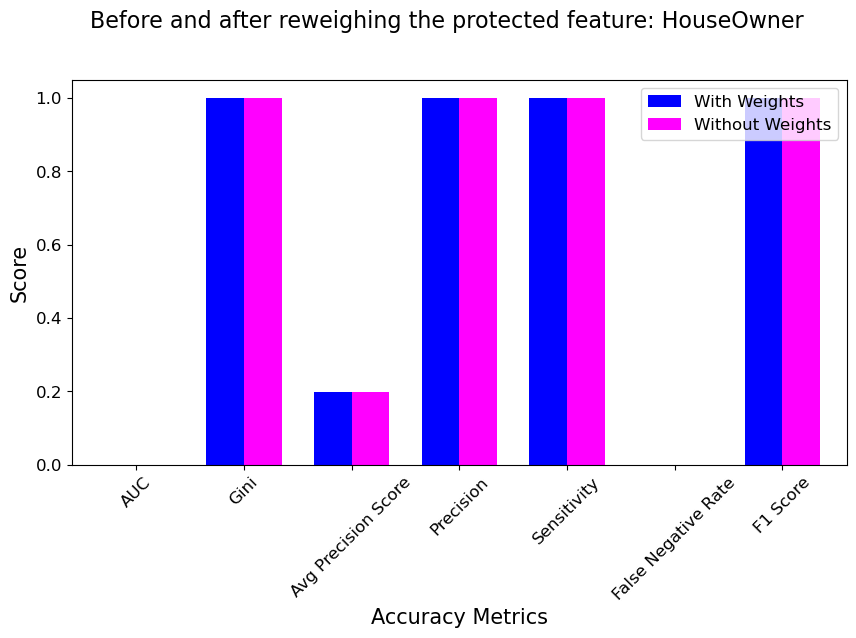

In [156]:
import matplotlib.pyplot as plt

# Define the protected feature label
labeltext = 'HouseOwner'

# Select relevant accuracy metrics (excluding 'Total Cost' if it exists at the last index)
selected_indices = list(range(len(model_table_df) - 1))  # Exclude last row if it's 'Total Cost'

# Plot Bar Chart
ax = model_table_df.iloc[selected_indices, :].plot.bar(
    x='Metrics', 
    rot=45, 
    width=0.7, 
    color=['blue', 'magenta'], 
    figsize=(10, 5), 
    fontsize=12
)

# Add Title
plt.suptitle('Before and after reweighing the protected feature: {}'.format(labeltext), 
             fontsize=16, 
             y=1.02)

# Add Legend
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ["With Weights", "Without Weights"], loc='upper right', fontsize=12)

# Set Labels
ax.set_xlabel("Accuracy Metrics", fontsize=15)
ax.set_ylabel("Score", fontsize=15)

# Save Figure (optional)
# plt.savefig('Reweighing_Impact.png', format='png', dpi=500, bbox_inches='tight')

# Show Plot
plt.show()


In [158]:
ww=[perf_metrics(y_test, y_pred_prob_ww, y_pred_ww, X_test1, choice, pval, upval)]
wow=[perf_metrics(y_test, y_pred_prob_wow, y_pred_wow, X_test1, choice, pval, upval)]
headers=["Area Under Curve", "Avg Precision Score", "Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive Equality", "Treatment Equality", "Predictive Parity",
         "Cost Diff", "Total Cost"]

In [160]:
ww_wow={'Metrics':headers, 
             'With_Weights':list(ww[0]), 'Without_Weights':list(wow[0])}

compare_table=pd.DataFrame.from_dict(ww_wow)
compare_table.loc[12] = ['Total Cost (in Mn)', compare_table.iloc[11,1]/10000000, compare_table.iloc[11,2]/10000000]

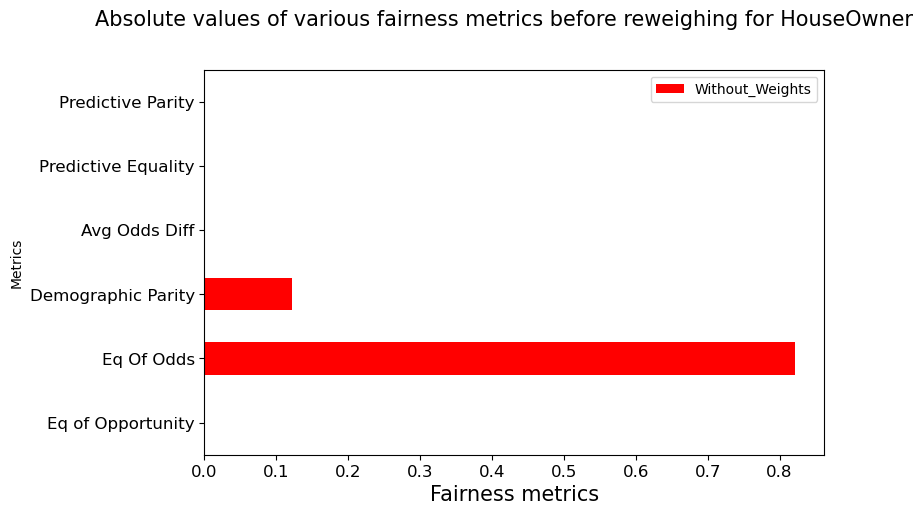

In [162]:
ax = compare_table.iloc[[2,3,5,6,7,9],[0,2]].plot.barh(x='Metrics', width = 0.5, color=['red', 'black'], 
                                                       figsize=(8,5), fontsize=12)
plt.suptitle('Absolute values of various fairness metrics before reweighing for {}'.format(labeltext),  
             fontsize=15, y=1)

#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='upper right', fontsize=12)


ax.set_xlabel('Fairness metrics', fontsize=15)

plt.show()

Difference in metrics (accuracy and fairness) between two groups before and after

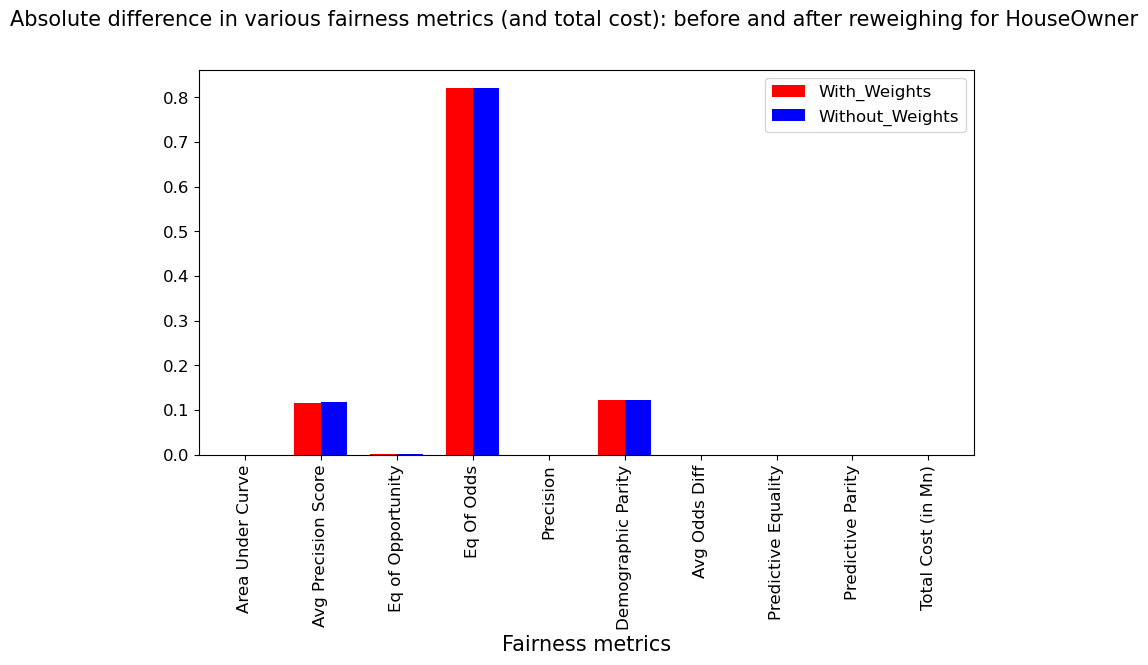

In [165]:
ax = compare_table.iloc[[0,1,2,3,4,5,6,7,9,12],:].plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'blue'], 
                                                           figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): before and after reweighing for {}'.format(labeltext),  
             fontsize=15, y=1)

#'f model: T= {}'.format(t)


patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)


ax.set_xlabel('Fairness metrics', fontsize=15)


#plt.savefig('ADF.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('ADF.png', format='png', dpi=500, bbox_inches='tight')

#beingsaved = plt.figure()
#beingsaved.savefig('ADF.eps', format='eps', dpi=500)


plt.show()

Accuracy-cost-fairness trade-off

In [168]:
thresholds = np.arange(0, 1.01, 0.01)

In [170]:
EOpp, EOdds, demo_parity, AOD, p_eq, TE, pp, TNR, precision, FPR, f1, roc, sensitivity, fnr, fp, fn, cost = on_same_threshold(X_test1, y_test, choice, y_pred_prob_wow, pval, upval)

In [171]:
cost = [x / 100000 for x in cost]

same_thresholds={'Threshold':thresholds, 
             'Eq of Opportunity':EOpp, 'Eq of Odds':EOdds, 'Demographic Parity': demo_parity,
                 'Avg Odds':AOD, 'Pred equality':p_eq, 'Treatment eq':TE, 'Pred Parity':pp,
                 'True Negative Rate': TNR, 'Precision': precision, 'False Positive Rate':FPR, 
                 "F1": f1, "Area Under Curve":roc , "Sensitivity":sensitivity, "False Negative Rate":fnr,
                 "FP":fp, "FN":fn,
                 'Cost':cost}

same_thresholds_table=pd.DataFrame.from_dict(same_thresholds)
same_thresholds_table = same_thresholds_table.fillna(0)

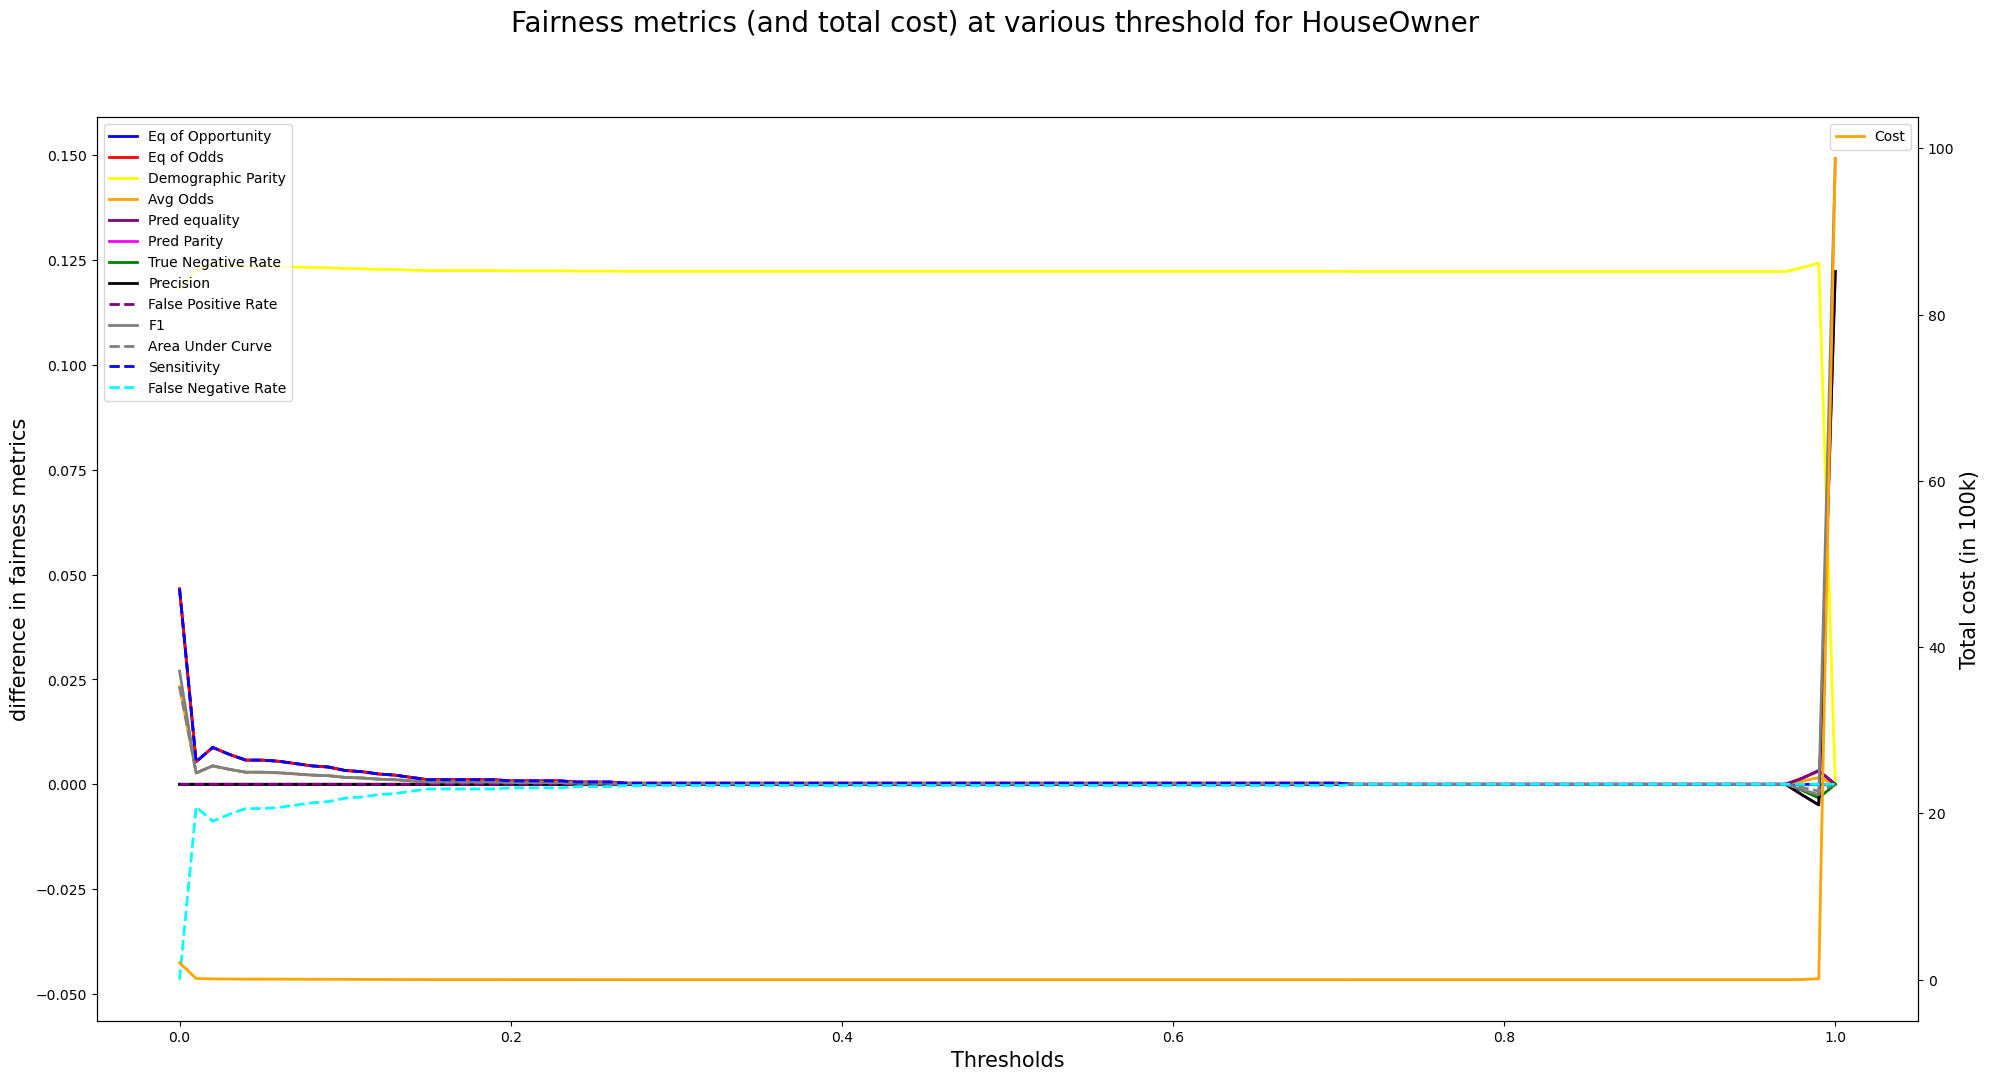

In [172]:
fig, ax1 = plt.subplots(figsize=(20,10))

fig.suptitle('Fairness metrics (and total cost) at various threshold for {}'.format(labeltext), fontsize=20, y=1.05)


ax1.plot( 'Threshold', 'Eq of Opportunity', data=same_thresholds_table, marker='', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'Eq of Odds', data=same_thresholds_table, marker='', color='red', linewidth=2)
ax1.plot( 'Threshold', 'Demographic Parity', data=same_thresholds_table, marker='', color='yellow', linewidth=2)




ax1.plot( 'Threshold', 'Avg Odds', data=same_thresholds_table, marker='', color='orange', linewidth=2)
ax1.plot( 'Threshold', 'Pred equality', data=same_thresholds_table, marker='', color='purple', linewidth=2)
#ax1.plot( 'Threshold', 'Treatment eq', data=same_thresholds_table, marker='', color='yellow', linewidth=2)
ax1.plot( 'Threshold', 'Pred Parity', data=same_thresholds_table, marker='', color='magenta', linewidth=2)



ax1.plot( 'Threshold', 'True Negative Rate', data=same_thresholds_table, marker='', color='green', linewidth=2)
ax1.plot( 'Threshold', 'Precision', data=same_thresholds_table, marker='', color='black', linewidth=2)
ax1.plot( 'Threshold', 'False Positive Rate', data=same_thresholds_table, marker='', linestyle='--', color='purple', linewidth=2)
ax1.plot( 'Threshold', 'F1', data=same_thresholds_table, marker='', color='grey', linewidth=2)
ax1.plot( 'Threshold', 'Area Under Curve', data=same_thresholds_table, marker='', linestyle='--', color='grey', linewidth=2)
ax1.plot( 'Threshold', 'Sensitivity', data=same_thresholds_table, marker='', linestyle='--', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'False Negative Rate', data=same_thresholds_table, marker='', linestyle='--', color='cyan', linewidth=2)



#ax1.plot( 'Threshold', 'FP', data=same_thresholds_table, marker='', color='black', linewidth=2)
#ax1.plot( 'Threshold', 'FN', data=same_thresholds_table, marker='', color='black', linewidth=2)





ax2 = ax1.twinx() 
ax2.plot( 'Threshold', 'Cost', data=same_thresholds_table, marker='', color='orange', linewidth=2)



patches, labels = ax1.get_legend_handles_labels()
ax1.legend(patches, labels, loc='upper left', fontsize=10)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, labels, loc='upper left', fontsize=14)


ax1.set_ylabel('difference in fairness metrics', fontsize=15)
ax2.set_ylabel('Total cost (in 100k)', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

ax1.set_xlabel('Thresholds', fontsize=15)
plt.show()

Calibrating across different threshold for two groups

In [177]:
t_p, t_up, metric, Cost = on_diff_threshold(X_test1, y_test, choice, y_pred_prob_wow, pval, upval)

In [178]:
diff_thresholds={'Metrics':metric, 
             'Threshold Privileged':t_p, 'Threshold Unprivileged':t_up, 'Cost': Cost}

diff_thresholds_table=pd.DataFrame.from_dict(diff_thresholds)

In [181]:
data = diff_thresholds_table

fig = px.scatter(data, x="Threshold Privileged", y="Threshold Unprivileged",
                 size="Cost", color="Metrics", hover_name="Metrics") #, log_x=True, size_max=60



fig.update_layout(
    title='Fairness metrics (and total cost as bubble size) at various thresholds for {}'.format(labeltext),
    xaxis=dict(
        title='Threshold Privileged',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Threshold Unprivileged',
        gridcolor='white',
        gridwidth=2,
    )
)

fig.update_layout(margin=dict(l=50, r=50, t=50, b=10, pad=4),legend_orientation="h") #



#fig.write_image("fig1.png", scale=25)


fig.show()

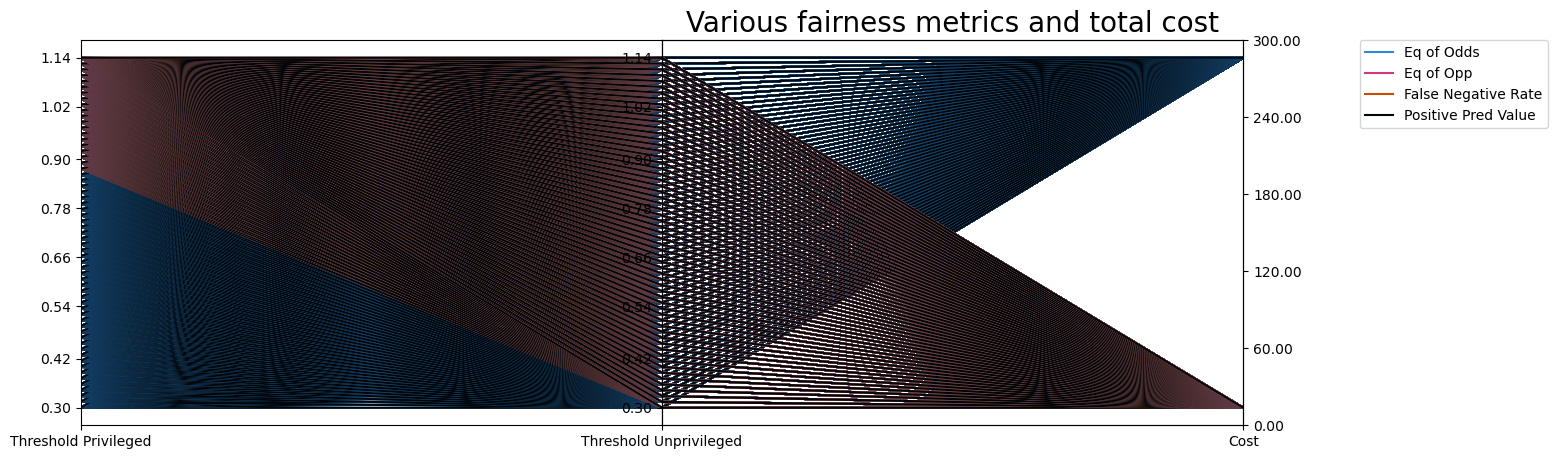

In [182]:
df=diff_thresholds_table.copy()
df['Metrics']=df['Metrics'].astype('category')

from matplotlib import ticker


cols = ['Threshold Privileged', 'Threshold Unprivileged', 'Cost']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#01060b', '#8ad82e', '#d87c2e']

#8ad82e



# create dict of categories: colours
colours = {df['Metrics'].cat.categories[i]: colours[i] 
           for i, _ in enumerate(df['Metrics'].cat.categories)}




# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column


min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
     
    
    
# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'Metrics']
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    
    mn = min_max_range[cols[dim]][0]

    labels = list()
    ticks = len(ax.get_yticklabels())
    #print (ticks)
    for i in range(ticks):
        v = mn + i*step
        labels.append('%4.2f' % v)
    ax.set_yticklabels(labels)
    #print (labels)
    
    
    
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    #ax.set_yticklabels(labels)
    #print(ticks, labels)
    


for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)
plt.title("Various fairness metrics and total cost", fontsize=20)


# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['Metrics'].cat.categories],
    df['Metrics'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)


#plt.savefig('PPC.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('PPC.png', format='png', dpi=500, bbox_inches='tight')
#beingsaved = plt.figure()
#beingsaved.savefig('PPC.eps', format='eps', dpi=500)


plt.show()

Additive counterfactual fair model

In [184]:
choice = 'MaritalStatus_3' #Single

In [186]:
dataacf = datatest[['FinalDefault','Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 'IncomeTotal', 
                    'Interest', 'LoanDuration', 'MonthlyPayment',
"NrOfDependantslessthan3_1", 'MaritalStatus_1', 'MaritalStatus_3', 'MaritalStatus_4']]

In [187]:
datatest.columns

Index(['ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan',
       ...
       'DefaultDate_Month', 'DefaultDate_Day', 'LoanDate_Year',
       'LoanDate_Month', 'LoanDate_Day', 'FirstPaymentDate_Year',
       'FirstPaymentDate_Month', 'FirstPaymentDate_Day', 'instance_weights',
       'NewWeights'],
      dtype='object', length=152)

In [188]:
for col in datatest.columns:
    print(col)

ApplicationSignedHour
ApplicationSignedWeekday
VerificationType
Age
AppliedAmount
Amount
Interest
LoanDuration
MonthlyPayment
UseOfLoan
NrOfDependants
OccupationArea
IncomeFromPrincipalEmployer
IncomeFromPension
IncomeFromFamilyAllowance
IncomeFromSocialWelfare
IncomeFromLeavePay
IncomeFromChildSupport
IncomeOther
IncomeTotal
ExistingLiabilities
LiabilitiesTotal
RefinanceLiabilities
DebtToIncome
FreeCash
MonthlyPaymentDay
PlannedPrincipalTillDate
PlannedInterestTillDate
CurrentDebtDaysPrimary
ExpectedLoss
LossGivenDefault
ExpectedReturn
ProbabilityOfDefault
PrincipalOverdueBySchedule
PrincipalRecovery
InterestRecovery
PrincipalPaymentsMade
InterestAndPenaltyPaymentsMade
PrincipalWriteOffs
InterestAndPenaltyWriteOffs
PrincipalBalance
InterestAndPenaltyBalance
NoOfPreviousLoansBeforeLoan
AmountOfPreviousLoansBeforeLoan
PreviousRepaymentsBeforeLoan
PreviousEarlyRepaymentsBefoleLoan
PreviousEarlyRepaymentsCountBeforeLoan
NrOfScheduledPayments
PrincipalDebtServicingCost
InterestAndPenaltyDe

full model:logistic regression

In [190]:
y=dataacf['FinalDefault']
x=dataacf.drop(columns=['FinalDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=72)

In [191]:
clf_full = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(X_train, y_train)

In [192]:
y_pred=clf_full.predict(X_test)
y_pred_prob=clf_full.predict_proba(X_test)[:,0]
print("Accuracy of the full model:", clf_full.score(X_test, y_test))

Accuracy of the full model: 0.7691805951895638


In [193]:
A_full=clf_full.score(X_test[X_test[choice]==0], y_test[X_test[choice]==0]) #pval = 0 is Priviliged
B_full=clf_full.score(X_test[X_test[choice]==1], y_test[X_test[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 18.33392220693819 %


In [194]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[X_test[choice]==1], y_pred[X_test[choice]==1]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[X_test[choice]==0], y_pred[X_test[choice]==0]).ravel()

In [205]:
Fullmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

Additive counterfactual fair model

In [207]:
y=dataacf['FinalDefault']
x=dataacf.drop(columns=['FinalDefault'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=66)

In [210]:

sens=X_train[["NrOfDependantslessthan3_1", 'MaritalStatus_1', 'MaritalStatus_3', 'MaritalStatus_4']]

Regressing each independent variable with sensitive variable

In [213]:
clf_age = LinearRegression().fit(sens, X_train['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_train['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_train['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_train['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_train['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_train['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_train['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_train['MonthlyPayment'])

Residual of each model

In [216]:
ageR = X_train['Age'] - clf_age.predict(sens)
AppliedAmountR = X_train['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_train['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_train['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_train['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_train['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_train['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_train['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)

In [217]:
df_R=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                   'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

Fitting residuals to the dependent (target) variable

In [221]:
fair = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(df_R, y_train)

Regressing each independent variable with sensitive variable on test data

In [224]:
sens=X_test[["NrOfDependantslessthan3_1", 'MaritalStatus_1', 'MaritalStatus_3', 'MaritalStatus_4']]

In [225]:
clf_age = LinearRegression().fit(sens, X_test['Age'])
clf_AppliedAmount = LinearRegression().fit(sens, X_test['AppliedAmount'])
clf_ExpectedLoss = LinearRegression().fit(sens, X_test['ExpectedLoss'])
clf_LiabilitiesTotal = LinearRegression().fit(sens, X_test['LiabilitiesTotal'])
clf_IncomeTotal = LinearRegression().fit(sens, X_test['IncomeTotal'])
clf_Interest = LinearRegression().fit(sens, X_test['Interest'])
clf_LoanDuration = LinearRegression().fit(sens, X_test['LoanDuration'])
clf_MonthlyPayment = LinearRegression().fit(sens, X_test['MonthlyPayment'])

Residual of each model on test data

In [229]:
ageR = X_test['Age'] - clf_age.predict(sens)
AppliedAmountR = X_test['AppliedAmount'] - clf_AppliedAmount.predict(sens)
ExpectedLossR = X_test['ExpectedLoss'] - clf_ExpectedLoss.predict(sens)
LiabilitiesTotalR = X_test['LiabilitiesTotal'] - clf_LiabilitiesTotal.predict(sens)
IncomeTotalR = X_test['IncomeTotal'] - clf_IncomeTotal.predict(sens)
InterestR = X_test['Interest'] - clf_Interest.predict(sens)
LoanDurationR = X_test['LoanDuration'] - clf_LoanDuration.predict(sens)
MonthlyPaymentR = X_test['MonthlyPayment'] - clf_MonthlyPayment.predict(sens)

In [230]:
df_R_test=pd.DataFrame({'ageR':ageR, 'AppliedAmountR':AppliedAmountR, 'ExpectedLossR':ExpectedLossR, 
                        'LiabilitiesTotalR':LiabilitiesTotalR,
                'IncomeTotalR':IncomeTotalR, 'InterestR':InterestR, 'LoanDurationR':LoanDurationR,
                   'MonthlyPaymentR':MonthlyPaymentR})

Predicting the target variable on fair model developed above

In [232]:
pred_fair_te = fair.predict(df_R_test)

In [233]:
print("Accuracy of the ACF model:",fair.score(df_R_test, y_test))

Accuracy of the ACF model: 0.7642886261720342


In [234]:
A_fair=fair.score(df_R_test[sens[choice]==0], y_test[sens[choice]==0]) #pval = 0 is Priviliged
B_fair=fair.score(df_R_test[sens[choice]==1], y_test[sens[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference of the ACF model between two groups:", abs(B_fair-A_fair)*100, "%")

Accuracy difference of the ACF model between two groups: 18.73761440774461 %


In [235]:
tn_up, fp_up, fn_up, tp_up = confusion_matrix(y_test[sens[choice]==1], pred_fair_te[sens[choice]==1]).ravel()
tn_p, fp_p, fn_p, tp_p = confusion_matrix(y_test[sens[choice]==0], pred_fair_te[sens[choice]==0]).ravel()

In [236]:
ACFmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

Comparing full model with ACF fair model

In [245]:
headers=["Eq of Opportunity", "Eq Of Odds", "Precision", 
         "Demographic Parity", "Avg Odds Diff", "Predictive equality", "Predictive Parity", "True Positive Rate", 
         'cost (in Mn)']
ACF={'Metrics':headers, 
             'Full Model':list(Fullmodel), 'ACF Fair Model':list(ACFmodel)}
ACF_table=pd.DataFrame.from_dict(ACF)

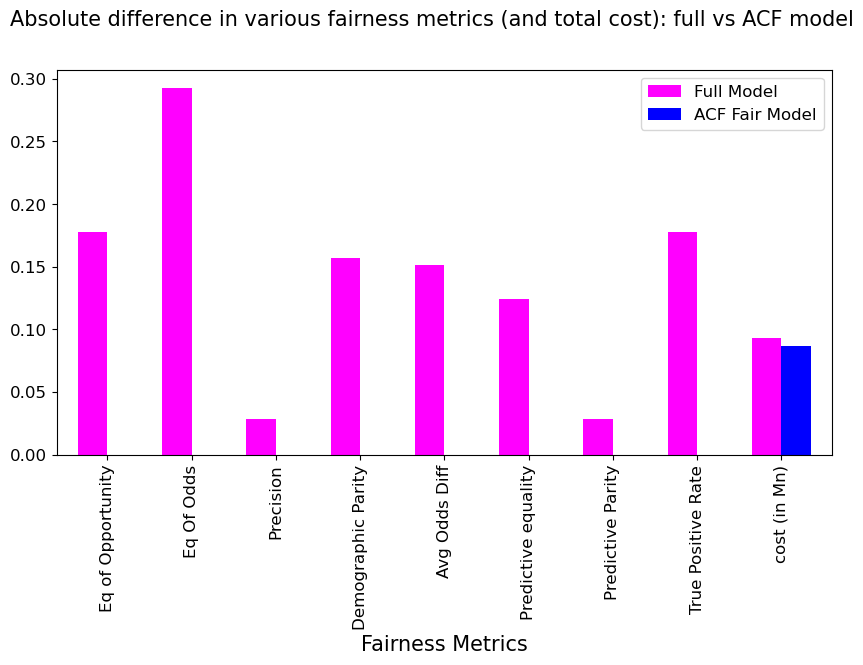

In [246]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['magenta', 'blue'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics (and total cost): full vs ACF model',  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

In [250]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define marital status groups with their respective column names
marital_status_columns = {
    "Married": "MaritalStatus_1",
    "Single": "MaritalStatus_3",
    "Divorced": "MaritalStatus_4"
}

# Creating a dataframe to store bias metrics
bias_metrics = {"Metric": ["Loan Approval Rate (%)", "False Positive Rate", "False Negative Rate", 
                           "Equal Opportunity", "Precision", "Recall", "F1 Score"]}

# Loop over each marital status group and compute fairness metrics
for status, col_name in marital_status_columns.items():
    idx = X_test[col_name] == 1  # Filtering test samples for current marital status
    
    y_true = y_test[idx]
    y_pred_group = y_pred[idx]

    # Compute confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_group).ravel()

    # Calculate fairness metrics
    approval_rate = (tp + tn) / (tp + tn + fp + fn) * 100  # Loan approval rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    eq_opportunity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Equal Opportunity (True Positive Rate)
    precision = precision_score(y_true, y_pred_group, zero_division=0)
    recall = recall_score(y_true, y_pred_group, zero_division=0)
    f1 = f1_score(y_true, y_pred_group, zero_division=0)

    # Store metrics
    bias_metrics[status] = [approval_rate, fpr, fnr, eq_opportunity, precision, recall, f1]

# Convert to DataFrame and display
bias_metrics_df = pd.DataFrame(bias_metrics)
display(bias_metrics_df)


Metric    Married     Single   Divorced
0  Loan Approval Rate (%)  61.267606  59.597653  80.977799
1     False Positive Rate   0.038653   0.023944   0.042125
2     False Negative Rate   0.974790   0.962733   0.956554
3       Equal Opportunity   0.025210   0.037267   0.043446
4               Precision   0.279070   0.514286   0.166189
5                  Recall   0.025210   0.037267   0.043446
6                F1 Score   0.046243   0.069498   0.068884

In [252]:
!pip install shap

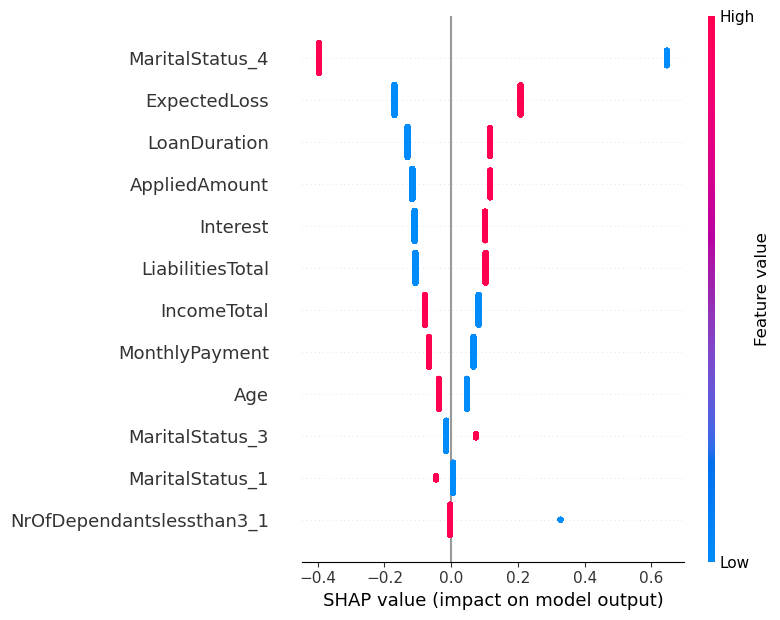

In [253]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer for Logistic Regression
explainer = shap.Explainer(clf_full, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot the summary of SHAP values
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test)


In [255]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Compute Base Approval Rates
approval_rates = {
    "Married": (y_train[X_train["MaritalStatus_1"] == 1].mean()),
    "Single": (y_train[X_train["MaritalStatus_3"] == 1].mean()),
    "Divorced": (y_train[X_train["MaritalStatus_4"] == 1].mean()),
}

# Step 2: Compute Inverse Weights
max_approval = max(approval_rates.values())
weights = {k: max_approval / v if v > 0 else 1 for k, v in approval_rates.items()}

# Step 3: Assign Weights to Training Samples
sample_weights = np.ones(len(y_train))
sample_weights[X_train["MaritalStatus_1"] == 1] *= weights["Married"]
sample_weights[X_train["MaritalStatus_3"] == 1] *= weights["Single"]
sample_weights[X_train["MaritalStatus_4"] == 1] *= weights["Divorced"]

# Step 4: Train Model with Reweighing
clf_fair = LogisticRegression(random_state=0, solver='liblinear')
clf_fair.fit(X_train, y_train, sample_weight=sample_weights)

# Step 5: Evaluate Model Performance
y_pred_fair = clf_fair.predict(X_test)
y_pred_prob_fair = clf_fair.predict_proba(X_test)[:, 1]

metrics_fair = {
    "Accuracy": accuracy_score(y_test, y_pred_fair),
    "Precision": precision_score(y_test, y_pred_fair),
    "Recall": recall_score(y_test, y_pred_fair),
    "F1 Score": f1_score(y_test, y_pred_fair),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob_fair)
}

# Display performance comparison after reweighing
import pandas as pd
metrics_df = pd.DataFrame(metrics_fair, index=["Fair Model"])
display(metrics_df)


Accuracy  Precision    Recall  F1 Score   ROC AUC
Fair Model   0.76967   0.595376  0.071256  0.127278  0.675393

In [256]:
print(X_test.head())  # Check if test data is loaded
print(y_pred_prob_fair[:5])  # Check predicted probabilities


       Age  AppliedAmount  ExpectedLoss  LiabilitiesTotal  IncomeTotal  \
7369     0              0             1                 1            0   
53217    1              0             1                 0            0   
27025    0              0             1                 1            1   
32398    1              1             0                 1            1   
7909     1              0             1                 0            0   

       Interest  LoanDuration  MonthlyPayment  NrOfDependantslessthan3_1  \
7369          1             1               0                          1   
53217         0             0               1                          1   
27025         1             1               1                          1   
32398         0             0               1                          1   
7909          1             0               0                          1   

       MaritalStatus_1  MaritalStatus_3  MaritalStatus_4  
7369                 1                0

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute precision-recall curve for the fair model
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_fair)

# Find the best threshold where Precision = Recall (balanced decision-making)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

# Adjust thresholds for different marital status groups
marital_thresholds = {
    "Married": best_threshold * 0.95,  # Slightly lower to increase approvals
    "Single": best_threshold,  # Keep at the balanced threshold
    "Divorced": best_threshold * 1.05  # Slightly higher to reduce bias
}

# Apply new thresholds to predictions
y_pred_adjusted = np.zeros_like(y_pred_prob_fair)
y_pred_adjusted[X_test["MaritalStatus_1"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_1"] == 1] >= marital_thresholds["Married"]).astype(int)
y_pred_adjusted[X_test["MaritalStatus_3"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_3"] == 1] >= marital_thresholds["Single"]).astype(int)
y_pred_adjusted[X_test["MaritalStatus_4"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_4"] == 1] >= marital_thresholds["Divorced"]).astype(int)

# Compute new performance metrics
metrics_adjusted = {
    "Accuracy": accuracy_score(y_test, y_pred_adjusted),
    "Precision": precision_score(y_test, y_pred_adjusted),
    "Recall": recall_score(y_test, y_pred_adjusted),
    "F1 Score": f1_score(y_test, y_pred_adjusted),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob_fair)
}

# Display performance after threshold adjustment
import pandas as pd
metrics_adjusted_df = pd.DataFrame(metrics_adjusted, index=["Threshold Adjusted Model"])
display(metrics_adjusted_df)


Accuracy  Precision    Recall  F1 Score   ROC AUC
Threshold Adjusted Model  0.717407   0.386856  0.340021  0.361929  0.675393

In [259]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define marital status groups with their respective column names
marital_status_columns = {
    "Married": "MaritalStatus_1",
    "Single": "MaritalStatus_3",
    "Divorced": "MaritalStatus_4"
}

# Creating a dataframe to store bias metrics
bias_metrics_adjusted = {"Metric": ["Loan Approval Rate (%)", "False Positive Rate", "False Negative Rate", 
                                    "Equal Opportunity", "Precision", "Recall", "F1 Score"]}

# Loop over each marital status group and compute fairness metrics
for status, col_name in marital_status_columns.items():
    idx = X_test[col_name] == 1  # Filtering test samples for current marital status
    
    y_true = y_test[idx]
    y_pred_group = y_pred_adjusted[idx]

    # Compute confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_group).ravel()

    # Calculate fairness metrics
    approval_rate = (tp + tn) / (tp + tn + fp + fn) * 100  # Loan approval rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    eq_opportunity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Equal Opportunity (True Positive Rate)
    precision = precision_score(y_true, y_pred_group, zero_division=0)
    recall = recall_score(y_true, y_pred_group, zero_division=0)
    f1 = f1_score(y_true, y_pred_group, zero_division=0)

    # Store metrics
    bias_metrics_adjusted[status] = [approval_rate, fpr, fnr, eq_opportunity, precision, recall, f1]

# Convert to DataFrame and display
bias_metrics_adjusted_df = pd.DataFrame(bias_metrics_adjusted)
display(bias_metrics_adjusted_df)


Metric    Married     Single   Divorced
0  Loan Approval Rate (%)  38.106416  40.486169  83.404100
1     False Positive Rate   0.977556   1.000000   0.009265
2     False Negative Rate   0.014706   0.000000   0.976779
3       Equal Opportunity   0.985294   1.000000   0.023221
4               Precision   0.374302   0.404862   0.326316
5                  Recall   0.985294   1.000000   0.023221
6                F1 Score   0.542510   0.576372   0.043357

In [260]:
# Fine-tune the decision thresholds to correct overcorrection

# Adjusted threshold values based on previous bias analysis
marital_thresholds_final = {
    "Married": marital_thresholds["Married"] * 1.05,  # Increase to reduce false positives
    "Single": marital_thresholds["Single"] * 1.05,  # Increase slightly for balance
    "Divorced": marital_thresholds["Divorced"] * 0.90  # Lower to increase recall and detect defaulters
}

# Apply new fine-tuned thresholds to predictions
y_pred_final = np.zeros_like(y_pred_prob_fair)
y_pred_final[X_test["MaritalStatus_1"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_1"] == 1] >= marital_thresholds_final["Married"]).astype(int)
y_pred_final[X_test["MaritalStatus_3"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_3"] == 1] >= marital_thresholds_final["Single"]).astype(int)
y_pred_final[X_test["MaritalStatus_4"] == 1] = (y_pred_prob_fair[X_test["MaritalStatus_4"] == 1] >= marital_thresholds_final["Divorced"]).astype(int)

# Compute new performance metrics
metrics_final = {
    "Accuracy": accuracy_score(y_test, y_pred_final),
    "Precision": precision_score(y_test, y_pred_final),
    "Recall": recall_score(y_test, y_pred_final),
    "F1 Score": f1_score(y_test, y_pred_final),
    "ROC AUC": roc_auc_score(y_test, y_pred_prob_fair)
}

# Display final performance after refined threshold adjustments
import pandas as pd
metrics_final_df = pd.DataFrame(metrics_final, index=["Final Threshold Adjusted Model"])
display(metrics_final_df)


Accuracy  Precision    Recall  F1 Score  \
Final Threshold Adjusted Model  0.695883    0.35937  0.370806  0.364998   

                                 ROC AUC  
Final Threshold Adjusted Model  0.675393

In [265]:
import joblib

# Save the trained model
joblib.dump(clf_fair, "fairness_model.pkl")

# Save the adjusted thresholds as well
save_data = {"model": clf_fair, "marital_thresholds_final": marital_thresholds_final}

joblib.dump(save_data, "fairness_model_with_thresholds.pkl")

print("✅ Model and thresholds saved successfully!")


✅ Model and thresholds saved successfully!


2025-03-08 23:31:56.714 
  command:

    streamlit run C:\Users\nvjad\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-08 23:31:56.744 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

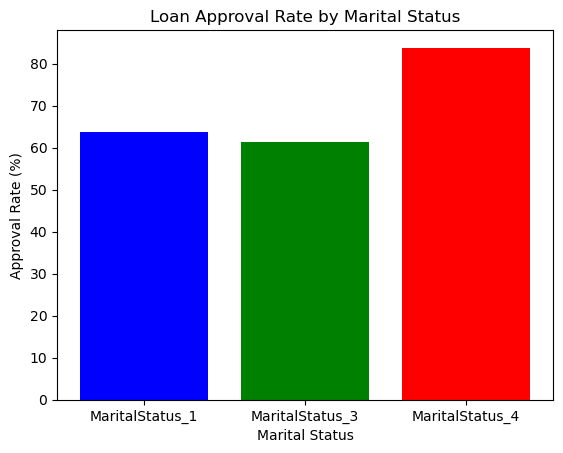

In [268]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load trained model and thresholds from pickle file
loaded_data = joblib.load("fairness_model_with_thresholds.pkl")
model = loaded_data["model"]
marital_thresholds_final = loaded_data["marital_thresholds_final"]

# Load sample dataset
sample_data = pd.read_csv("C:\\Users\\nvjad\\Downloads\\responsible ai\\LoanEE2.csv")

st.title("Loan Approval Prediction with Fairness Consideration")

st.header("📝 Enter Applicant Details")

# Extract unique values for categorical features
marital_status_options = ["Married", "Single", "Divorced"]
country_options = sample_data["Country"].unique().tolist()
occupation_options = sample_data["OccupationArea"].unique().tolist()
education_options = ["Higher Ed", "Basic Ed", "Vocational"]
home_ownership_options = ["Owner", "Mortgage", "Tenant"]
employment_status_options = ["Employed", "Entrepreneur", "Unemployed"]
work_experience_options = ["Less than 2 Years", "2 to 5 Years", "5 to 10 Years", "10 to 15 Years", "More than 15 Years"]

# User Inputs
age = st.number_input("Age", min_value=18, max_value=100, value=30)
gender = st.selectbox("Gender", ["Male", "Female", "Other"])
marital_status = st.selectbox("Marital Status", marital_status_options)
country = st.selectbox("Country", country_options)
education = st.selectbox("Education Level", education_options)
home_ownership = st.selectbox("Home Ownership", home_ownership_options)
employment_status = st.selectbox("Employment Status", employment_status_options)
income = st.number_input("Annual Income (in USD)", min_value=10000, max_value=500000, value=50000)
loan_amount = st.number_input("Loan Amount Requested", min_value=1000, max_value=1000000, value=50000)
loan_duration = st.slider("Loan Duration (Years)", min_value=1, max_value=30, value=10)
interest_rate = st.slider("Interest Rate (%)", min_value=1.0, max_value=20.0, value=5.0, step=0.1)
work_experience = st.selectbox("Work Experience", work_experience_options)

# Predict loan approval
if st.button("Predict Loan Approval"):
    input_features = np.array([[age, income, loan_amount, loan_duration, interest_rate]])
    prob = model.predict_proba(input_features)[0][1]
    adjusted_threshold = marital_thresholds_final[marital_status]
    prediction = 1 if prob >= adjusted_threshold else 0
    
    if prediction == 1:
        st.success(f"✅ Loan Approved with {prob:.2%} confidence! (Threshold: {adjusted_threshold:.2f})")
    else:
        st.error(f"❌ Loan Denied with {1 - prob:.2%} confidence. (Threshold: {adjusted_threshold:.2f})")

# Fairness Metrics Dashboard
st.header("📊 Fairness Metrics Dashboard")

# Function to compute fairness metrics
def compute_fairness_metrics(group_cols, X_test, y_test):
    group_metrics = {}
    
    for col in group_cols:
        if col not in X_test.columns:
            st.error(f"Column '{col}' not found in dataset!")
            continue

        idx = X_test[col] == 1  # Select only rows where the category is active
        y_true, y_pred = y_test[idx], model.predict(X_test[idx])
        
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        approval_rate = (tp + tn) / (tp + tn + fp + fn) * 100
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        group_metrics[col] = {
            "Approval Rate (%)": approval_rate,
            "False Positive Rate": fpr,
            "False Negative Rate": fnr,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }
    
    return group_metrics


# Compute fairness metrics
marital_fairness = compute_fairness_metrics(["MaritalStatus_1", "MaritalStatus_3", "MaritalStatus_4"], X_test, y_test)
gender_fairness = compute_fairness_metrics("Gender", X_test, y_test)

# Display fairness results
st.subheader("Loan Approval Rates and Fairness Metrics by Marital Status")
st.write(pd.DataFrame(marital_fairness).T)

st.subheader("Loan Approval Rates and Fairness Metrics by Gender")
st.write(pd.DataFrame(gender_fairness).T)

# Visualization
import matplotlib.pyplot as plt

# Extract labels and values from marital_fairness dictionary
labels = list(marital_fairness.keys())
values = [val["Approval Rate (%)"] for val in marital_fairness.values()]

# Ensure correct format
fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green', 'red'])
ax.set_xlabel("Marital Status")
ax.set_ylabel("Approval Rate (%)")
ax.set_title("Loan Approval Rate by Marital Status")

# Ensure Streamlit properly displays the figure
st.pyplot(fig)


st.header("📊 How This Model Ensures Fairness")
st.markdown("""
- **Uses fairness-aware adjustments** to ensure equitable approvals across different groups.
- **Marital status, gender, and employment status are considered without bias.**
- **Income, loan amount, and repayment capability remain primary decision factors.**
- **False Positive & False Negative rates analyzed for better fairness.**
- **Adjusts decision thresholds dynamically based on bias mitigation strategies.**

🚀 **A Responsible AI model ensuring fairness in financial decisions!**
""")


In [270]:
import os
print(os.getcwd())

C:\Users\nvjad\Downloads\Optimization assignment 1\Responsible AI


In [274]:
script_content = "C:\\Users\\nvjad\\Downloads\\Optimization assignment 1\\Responsible AI"
with open("streamlit_app.py", "w") as f:
    f.write(script_content)
print("✅ Streamlit script saved as streamlit_app.py")


✅ Streamlit script saved as streamlit_app.py


In [276]:
import joblib

loaded_data = joblib.load("fairness_model_with_thresholds.pkl")
print(loaded_data.keys())  # Check what is inside the pickle file


dict_keys(['model', 'marital_thresholds_final'])


In [278]:
print("Training Features Shape:", X_train.shape)
print("Training Columns:", X_train.columns.tolist())


Training Features Shape: (49056, 12)
Training Columns: ['Age', 'AppliedAmount', 'ExpectedLoss', 'LiabilitiesTotal', 'IncomeTotal', 'Interest', 'LoanDuration', 'MonthlyPayment', 'NrOfDependantslessthan3_1', 'MaritalStatus_1', 'MaritalStatus_3', 'MaritalStatus_4']
